In [213]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

### Reading CSV file (fuel consumption data)

In [214]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

#### checking data types

In [215]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

### Showing statistical Information

In [216]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

### Getting the summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Data Wrangling

#### Checking for NaN Value

In [10]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### checking for Null value

In [11]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### checking value counts

In [15]:
df['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [14]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [16]:
df['MODEL'].value_counts()

F150 FFV                             8
F150 FFV 4X4                         8
ACCORD                               6
FOCUS FFV                            6
BEETLE                               6
PASSAT                               5
SILVERADO 4WD                        5
SILVERADO                            5
MUSTANG                              5
SIERRA                               5
SIERRA 4WD                           5
FUSION                               4
PATRIOT                              4
R8 SPYDER                            4
FORTE KOUP                           4
FORTE 5                              4
ATS                                  4
FORTE                                4
BEETLE CONVERTIBLE                   4
TACOMA 4WD                           4
COMPASS                              4
COROLLA                              4
SONIC 5                              4
SONIC                                4
JETTA                                4
IMPREZA AWD              

In [17]:
df['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [18]:
df['TRANSMISSION'].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [19]:
df['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

### Turning categorial variable into numerical variable

In [217]:
FUELTYPE = pd.get_dummies(df['FUELTYPE'])
FUELTYPE

D  E  X  Z
0     0  0  0  1
1     0  0  0  1
2     0  0  0  1
3     0  0  0  1
4     0  0  0  1
5     0  0  0  1
6     0  0  0  1
7     0  0  0  1
8     0  0  0  1
9     0  0  0  1
10    0  0  0  1
11    0  0  0  1
12    0  0  0  1
13    0  0  0  1
14    0  0  0  1
15    0  0  0  1
16    0  0  0  1
17    0  0  0  1
18    0  0  0  1
19    0  0  0  1
20    0  0  0  1
21    0  0  0  1
22    0  0  0  1
23    0  0  0  1
24    0  0  0  1
25    0  0  0  1
26    0  0  0  1
27    1  0  0  0
28    0  0  0  1
29    1  0  0  0
30    0  0  0  1
31    0  0  0  1
32    1  0  0  0
33    0  0  0  1
34    0  0  0  1
35    0  0  0  1
36    1  0  0  0
37    0  0  0  1
38    0  0  0  1
39    0  0  0  1
40    0  0  0  1
41    1  0  0  0
42    0  0  0  1
43    1  0  0  0
44    0  0  0  1
45    0  0  0  1
46    0  0  0  1
47    0  0  0  1
48    0  0  0  1
49    0  0  0  1
50    0  0  0  1
51    0  0  0  1
52    0  0  0  1
53    0  0  0  1
54    0  0  0  1
55    0  0  0  1
56    0  0  0  1
57    0  0  0  1
58    0  0  0  1
59    0  0  0  1
60    0  0  0  1
61    0  0  0  1
62    0  0  0  1
63    0  0  0  1
64    0  0  0  1
65    0  0  0  1
66    0  0  0  1
67    0  0  0  1
68    0  0  0  1
69    0  0  0  1
70    0  0  0  1
71    0  0  0  1
72    0  0  0  1
73    0  0  0  1
74    0  0  0  1
75    0  0  0  1
76    0  0  0  1
77    0  0  0  1
78    0  0  0  1
79    1  0  0  0
80    1  0  0  0
81    0  0  0  1
82    0  0  0  1
83    0  0  0  1
84    0  0  0  1
85    0  0  0  1
86    0  0  0  1
87    0  0  0  1
88    0  0  0  1
89    0  0  0  1
90    0  0  0  1
91    0  0  0  1
92    0  0  0  1
93    0  0  0  1
94    0  0  0  1
95    0  0  0  1
96    0  0  0  1
97    0  0  0  1
98    0  0  0  1
99    0  0  0  1
100   1  0  0  0
101   0  0  0  1
102   0  0  0  1
103   0  0  0  1
104   0  0  0  1
105   0  0  0  1
106   0  0  0  1
107   0  0  0  1
108   0  0  0  1
109   0  0  0  1
110   0  0  0  1
111   0  0  0  1
112   0  0  0  1
113   0  0  0  1
114   0  0  0  1
115   0  0  0  1
116   0  0  0  1
117   0  0  0  1
118   0  0  0  1
119   0  0  0  1
120   0  0  0  1
121   0  0  0  1
122   0  0  0  1
123   0  0  0  1
124   0  0  0  1
125   0  0  0  1
126   0  0  0  1
127   0  0  0  1
128   0  0  0  1
129   0  0  0  1
130   0  0  0  1
131   0  0  0  1
132   0  0  0  1
133   0  0  0  1
134   0  0  0  1
135   0  0  0  1
136   0  0  0  1
137   0  0  0  1
138   0  0  0  1
139   0  0  0  1
140   0  0  1  0
141   0  0  1  0
142   0  0  1  0
143   0  0  1  0
144   0  0  1  0
145   0  1  0  0
146   0  0  1  0
147   0  1  0  0
148   0  0  1  0
149   0  0  0  1
150   0  0  0  1
151   0  0  0  1
152   0  0  1  0
153   0  0  0  1
154   0  0  0  1
155   0  0  1  0
156   0  0  0  1
157   0  0  0  1
158   0  0  1  0
159   0  0  1  0
160   0  0  0  1
161   0  0  1  0
162   0  0  1  0
163   0  0  1  0
164   0  0  0  1
165   0  0  1  0
166   0  0  0  1
167   0  0  1  0
168   0  0  0  1
169   0  0  1  0
170   0  0  1  0
171   0  0  1  0
172   0  0  1  0
173   0  0  0  1
174   0  0  0  1
175   0  0  0  1
176   0  0  0  1
177   0  0  0  1
178   0  0  0  1
179   0  0  0  1
180   0  1  0  0
181   0  0  0  1
182   0  1  0  0
183   0  0  1  0
184   0  0  1  0
185   0  0  1  0
186   0  0  1  0
187   0  0  0  1
188   0  0  1  0
189   0  0  1  0
190   0  0  1  0
191   0  0  0  1
192   0  0  0  1
193   0  0  0  1
194   0  0  0  1
195   0  0  0  1
196   0  0  0  1
197   0  0  1  0
198   0  0  1  0
199   0  0  1  0
200   0  0  1  0
201   1  0  0  0
202   0  0  1  0
203   0  0  1  0
204   0  0  1  0
205   0  0  1  0
206   0  1  0  0
207   0  0  1  0
208   0  0  1  0
209   0  1  0  0
210   0  0  1  0
211   0  0  1  0
212   0  1  0  0
213   0  0  1  0
214   0  1  0  0
215   0  0  1  0
216   0  1  0  0
217   0  0  1  0
218   0  1  0  0
219   0  0  1  0
220   0  1  0  0
221   0  0  1  0
222   0  1  0  0
223   0  0  1  0
224   0  0  1  0
225   0  1  0  0
226   0  0  1  0
227   0  0  1  0
228   0  1  0  0
229   0  0  1  0
230   0  0  1  0
231   0  1  0  0
232   0  0  1  0
233   0  0  0  1
234   0  0 

In [218]:
df.drop('FUELTYPE',inplace=True,axis=1)

In [219]:
df['FUELTYPE_D'] = FUELTYPE['D'].copy()
df['FUELTYPE_E'] = FUELTYPE['E'].copy()
df['FUELTYPE_X'] = FUELTYPE['X'].copy()
df['FUELTYPE_Z'] = FUELTYPE['Z'].copy()

In [225]:
TRANSMISSION =  pd.get_dummies(df['TRANSMISSION'])
TRANSMISSION

A4  A5  A6  A7  A8  A9  AM5  AM6  AM7  AS4  AS5  AS6  AS7  AS8  AS9  AV  \
0      0   0   0   0   0   0    0    0    0    0    1    0    0    0    0   0   
1      0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
2      0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
3      0   0   0   0   0   0    0    0    0    0    0    1    0    0    0   0   
4      0   0   0   0   0   0    0    0    0    0    0    1    0    0    0   0   
5      0   0   0   0   0   0    0    0    0    0    0    1    0    0    0   0   
6      0   0   0   0   0   0    0    0    0    0    0    1    0    0    0   0   
7      0   0   0   0   0   0    0    0    0    0    0    1    0    0    0   0   
8      0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
9      0   0   0   0   0   0    0    0    0    0    1    0    0    0    0   0   
10     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
11     0   0   0   0   0   0    0    0    0    0    1    0    0    0    0   0   
12     0   0   1   0   0   0    0    0    0    0    0    0    0    0    0   0   
13     0   0   1   0   0   0    0    0    0    0    0    0    0    0    0   0   
14     0   0   0   0   0   0    0    0    1    0    0    0    0    0    0   0   
15     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
16     0   0   0   0   0   0    0    0    1    0    0    0    0    0    0   0   
17     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
18     0   0   1   0   0   0    0    0    0    0    0    0    0    0    0   0   
19     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
20     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
21     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
22     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
23     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
24     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
25     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
26     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
27     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
28     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
29     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
30     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
31     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
32     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
33     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
34     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
35     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
36     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
37     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
38     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
39     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
40     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
41     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
42     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
43     0   0   0   0   0   0    0    0    0    0    0    0    0    1    0   0   
44     0   0   0   1   0   0    0    0    0    0    0    0    0    0    0   0   
45     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
46     0   0   0   1   0   0    0    0    0    0    0    0    0    0    0   0   
47     0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   0   
48     0   0   0   1   0   0    0    

In [226]:
df.drop('TRANSMISSION',inplace=True,axis=1)

In [231]:
df['TRANSMISSION_A4'] = TRANSMISSION['A4'].copy()
df['TRANSMISSION_A5'] = TRANSMISSION['A5'].copy()
df['TRANSMISSION_A6'] = TRANSMISSION['A6'].copy()
df['TRANSMISSION_A7'] = TRANSMISSION['A7'].copy()
df['TRANSMISSION_A8'] = TRANSMISSION['A8'].copy()
df['TRANSMISSION_A9'] = TRANSMISSION['A9'].copy()
df['TRANSMISSION_AM5'] = TRANSMISSION['AM5'].copy()
df['TRANSMISSION_AM6'] = TRANSMISSION['AM6'].copy()
df['TRANSMISSION_AM7'] = TRANSMISSION['AM7'].copy()
df['TRANSMISSION_AS4'] = TRANSMISSION['AS4'].copy()
df['TRANSMISSION_AS5'] = TRANSMISSION['AS5'].copy()
df['TRANSMISSION_AS6'] = TRANSMISSION['AS6'].copy()
df['TRANSMISSION_AS7'] = TRANSMISSION['AS7'].copy()
df['TRANSMISSION_AS8'] = TRANSMISSION['AS8'].copy()
df['TRANSMISSION_AS9'] = TRANSMISSION['AS9'].copy()
df['TRANSMISSION_AV'] = TRANSMISSION['AV'].copy()
df['TRANSMISSION_AV6'] = TRANSMISSION['AV6'].copy()
df['TRANSMISSION_AV7'] = TRANSMISSION['AV7'].copy()
df['TRANSMISSION_AV8'] = TRANSMISSION['AV8'].copy()
df['TRANSMISSION_M5'] = TRANSMISSION['M5'].copy()
df['TRANSMISSION_M6'] = TRANSMISSION['M6'].copy()
df['TRANSMISSION_M7'] = TRANSMISSION['M7'].copy()

In [232]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

   FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0                   9.9                  6.7                   8.5   
1                  11.2                  7.7                   9.6   
2                   6.0                  5.8                   5.9   
3                  12.7                  9.1                  11.1   
4                  12.1                  8.7                  10.6   

   FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  FUELTYPE_D  FUELTYPE_E  FUELTYPE_X  \
0                        33           196           0           0           0   
1                        29           221           0           0           0   
2                        48           136           0           0           0   
3                        25           255           0           0           0   
4                        27           244           0           0           0   

   FUELTYPE_Z  TRANSMISSION_A4  TRANSMISSION_A5  TRANSMISSION_A6  \
0           1                0                0                0   
1           1                0                0                0   
2           1                0                0                0   
3           1                0                0                0   
4           1                0                0                0   

   TRANSMISSION_A7  TRANSMISSION_A8  TRANSMISSION_A9  TRANSMISSION_AM5  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   TRANSMISSION_AM6  TRANSMISSION_AM7  TRANSMISSION_AS4  TRANSMISSION_AS5  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   TRANSMISSION_AS6  TRANSMISSION_AS7  TRANSMISSION_AS8  TRANSMISSION_AS9  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 1                 0                 0                 0   
4                 1                 0                 0                 0   

   TRANSMISSION_AV  TRANSMISSION_AV6  TRANSMISSION_AV7  TRANSMISSION_AV8  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 1                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   TRANSMISSION_M5  TRANSMISSION_M6  TRANSMISSION_M7  
0                0                0                0  
1                0                1                0  
2                0                0                0  
3                0                0                0  
4                0                0                0

#### Boxplot analysis

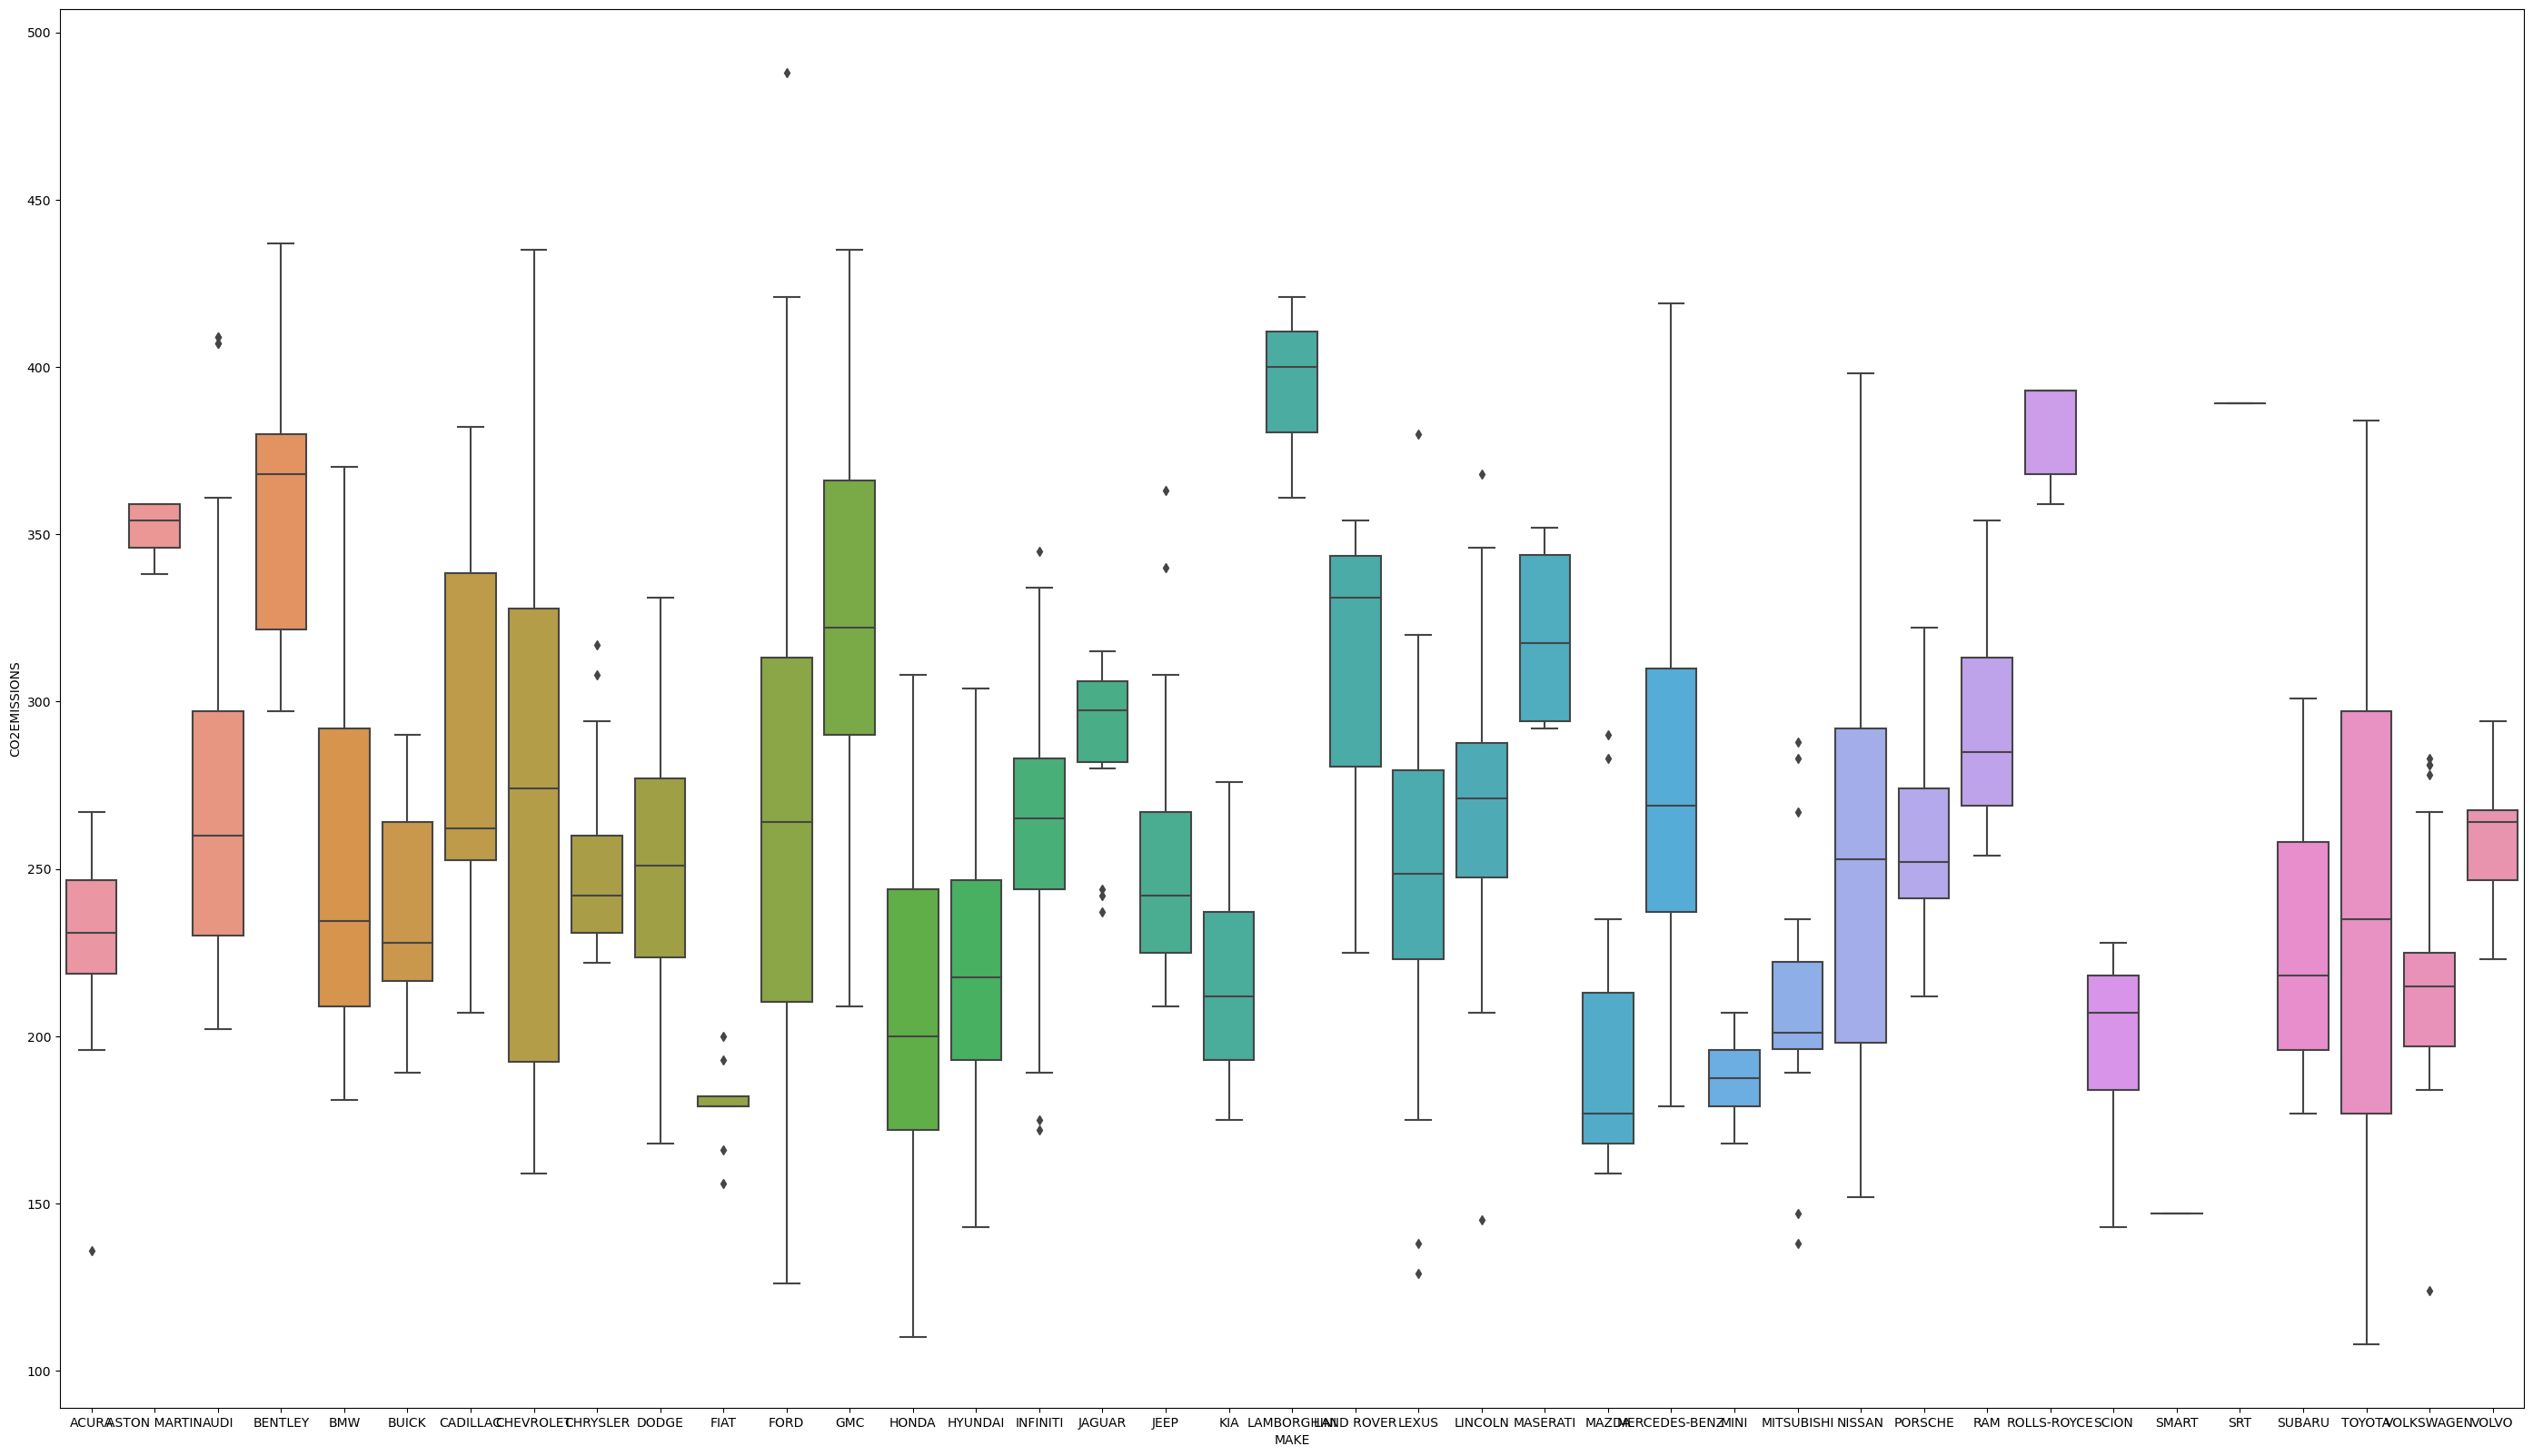

In [220]:
plt.figure(figsize = (35,20))
sns.boxplot(x='MAKE',y='CO2EMISSIONS',data = df)
plt.show()

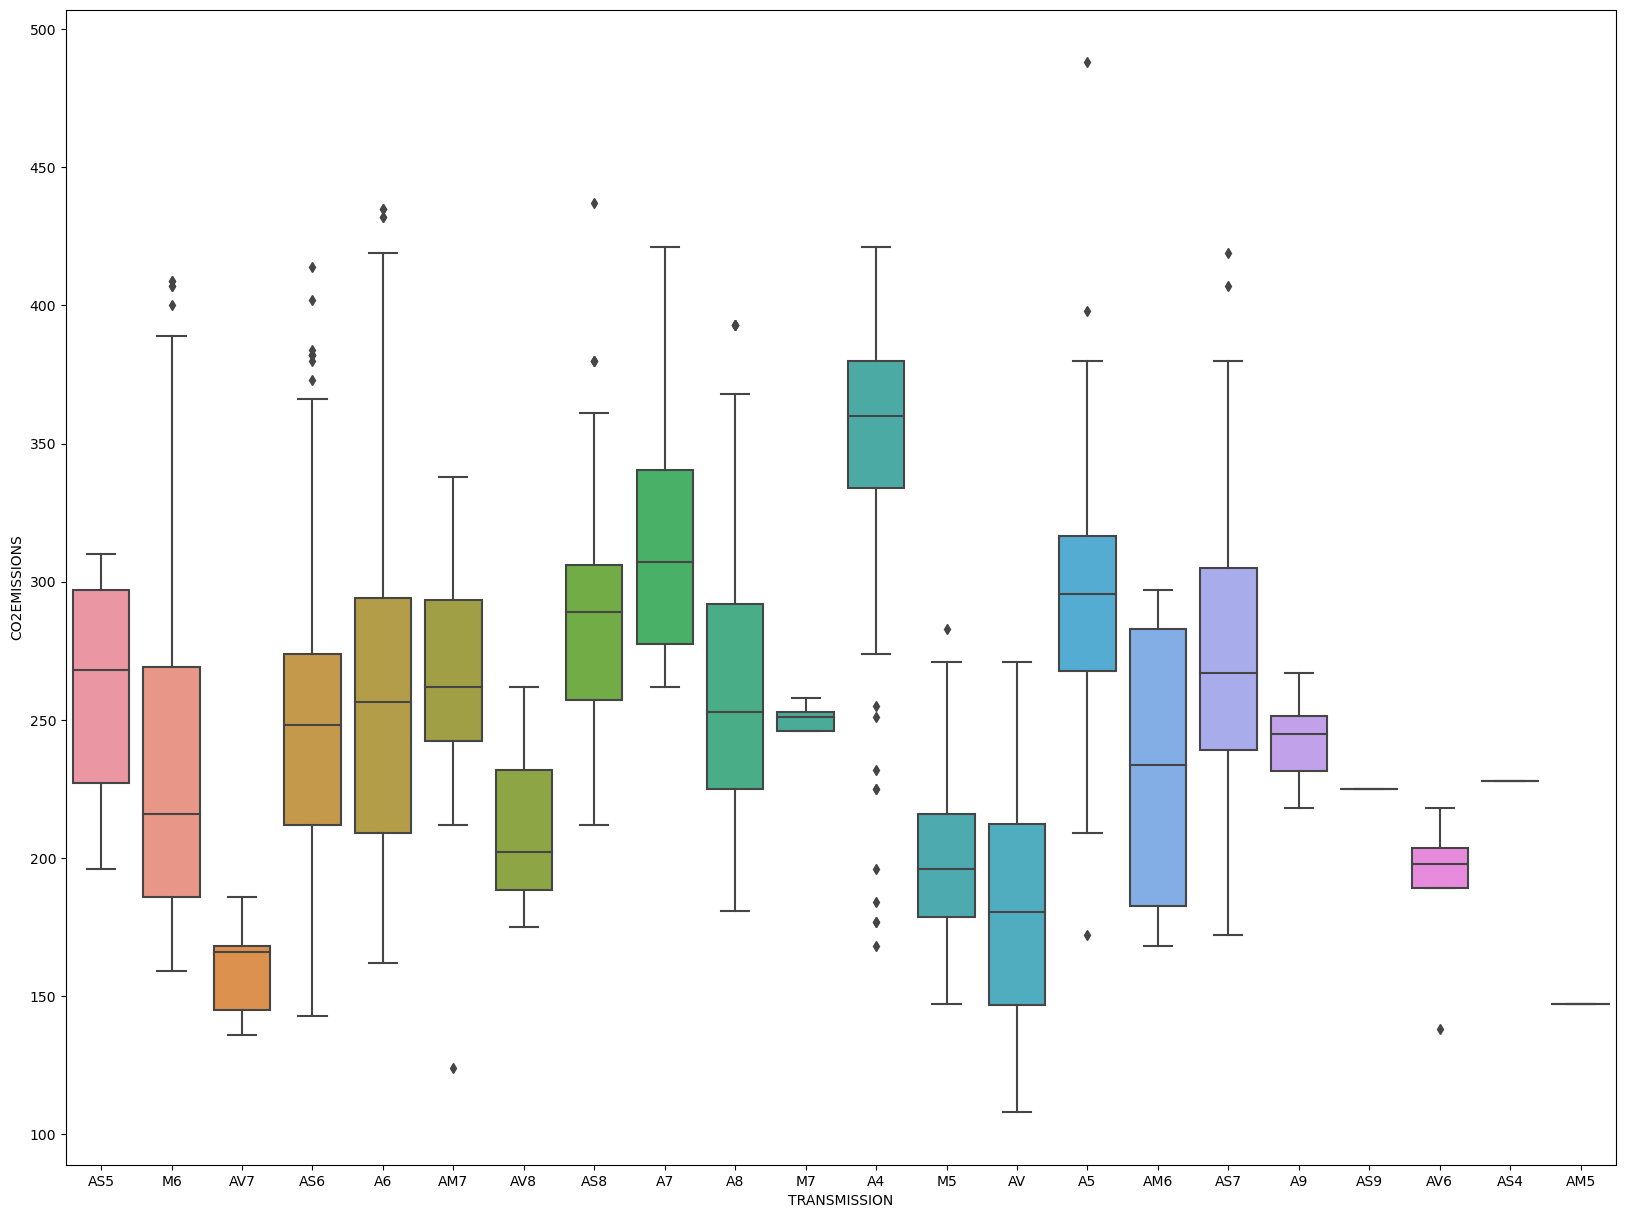

In [28]:
plt.figure(figsize = (20,15))
sns.boxplot(x='TRANSMISSION',y='CO2EMISSIONS',data = df)

plt.show()

In [222]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5                   9.9                  6.7   
1           M6                  11.2                  7.7   
2          AV7                   6.0                  5.8   
3          AS6                  12.7                  9.1   
4          AS6                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  FUELTYPE_D  \
0                   8.5                        33           196           0   
1                   9.6                        29           221           0   
2                   5.9                        48           136           0   
3                  11.1                        25           255           0   
4                  10.6                        27           244           0   

   FUELTYPE_E  FUELTYPE_X  FUELTYPE_Z  
0           0           0           1  
1           0           0           1  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [237]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
FUELTYPE_D                    uint8
FUELTYPE_E                    uint8
FUELTYPE_X                    uint8
FUELTYPE_Z                    uint8
TRANSMISSION_A4               uint8
TRANSMISSION_A5               uint8
TRANSMISSION_A6               uint8
TRANSMISSION_A7               uint8
TRANSMISSION_A8               uint8
TRANSMISSION_A9               uint8
TRANSMISSION_AM5              uint8
TRANSMISSION_AM6              uint8
TRANSMISSION_AM7              uint8
TRANSMISSION_AS4              uint8
TRANSMISSION_AS5              uint8
TRANSMISSION_AS6              uint8
TRANSMISSION_AS7            

### Scatter Plot Analysis

In [238]:
columns = df[['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','TRANSMISSION_A4','TRANSMISSION_A5','TRANSMISSION_A6','TRANSMISSION_A7','TRANSMISSION_A8','TRANSMISSION_A9','TRANSMISSION_AM5','TRANSMISSION_AM6','TRANSMISSION_AM7','TRANSMISSION_AS4','TRANSMISSION_AS5','TRANSMISSION_AS6','TRANSMISSION_AS7','TRANSMISSION_AS8','TRANSMISSION_AS9','TRANSMISSION_AV','TRANSMISSION_AV6','TRANSMISSION_AV7','TRANSMISSION_AV8','TRANSMISSION_M5','TRANSMISSION_M6','TRANSMISSION_M7']]

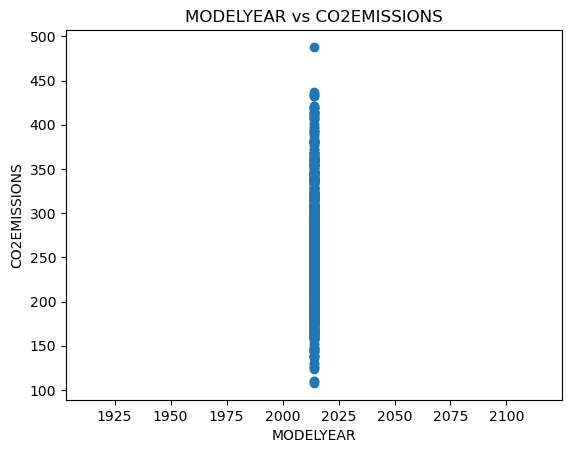

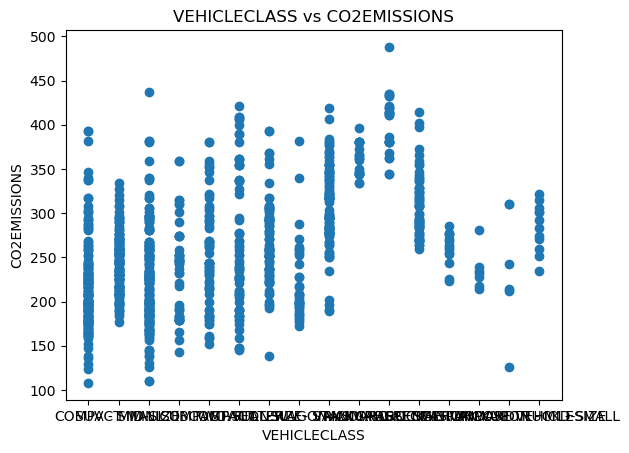

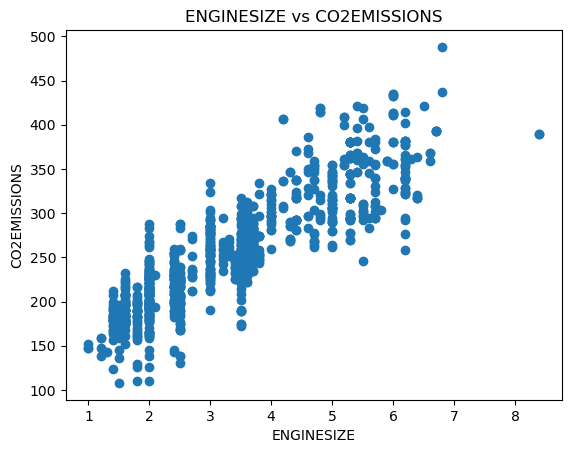

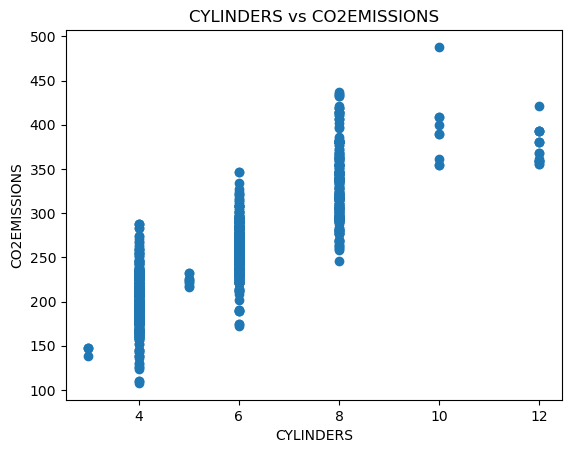

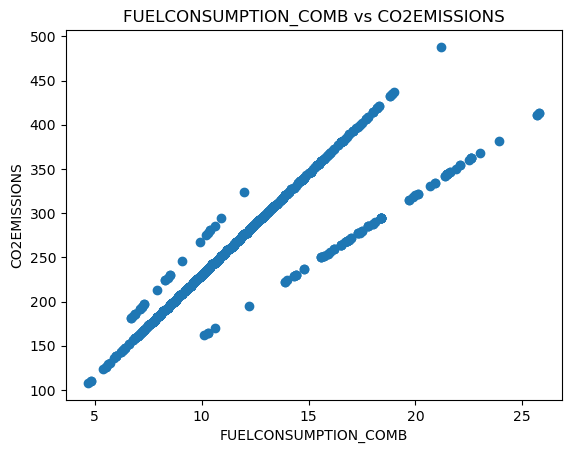

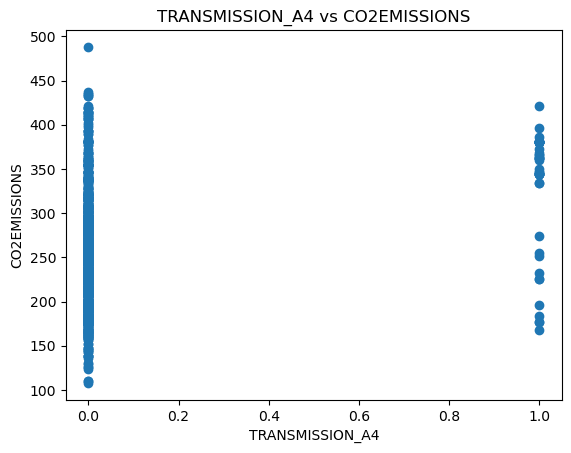

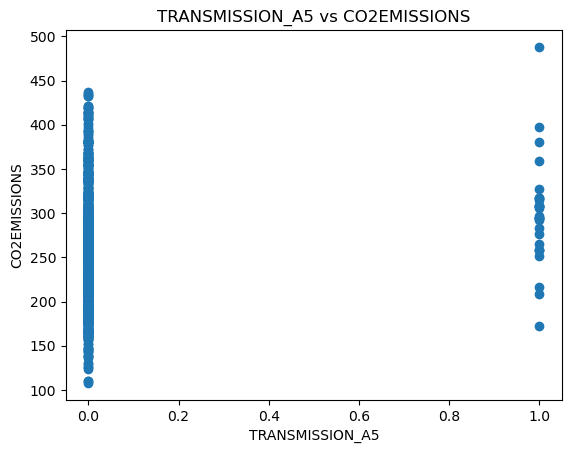

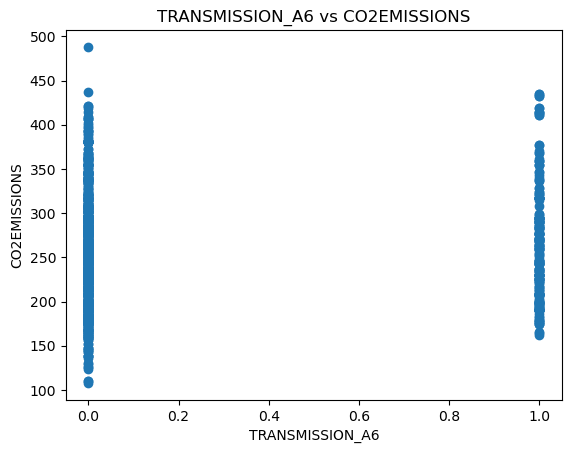

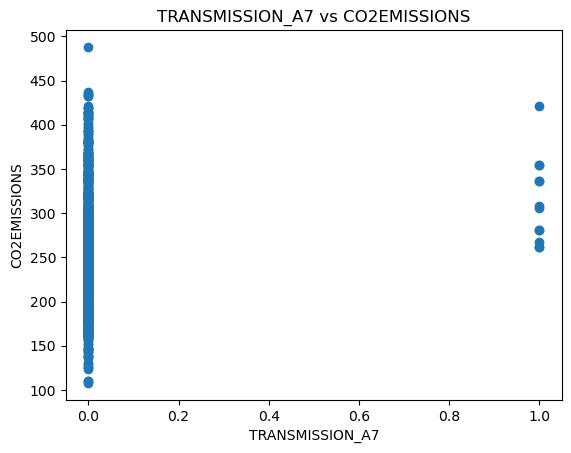

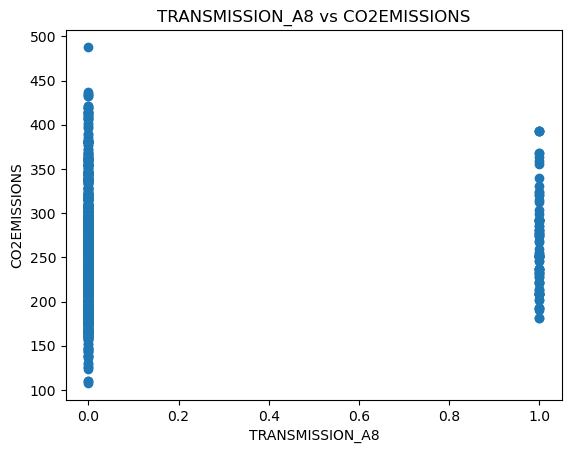

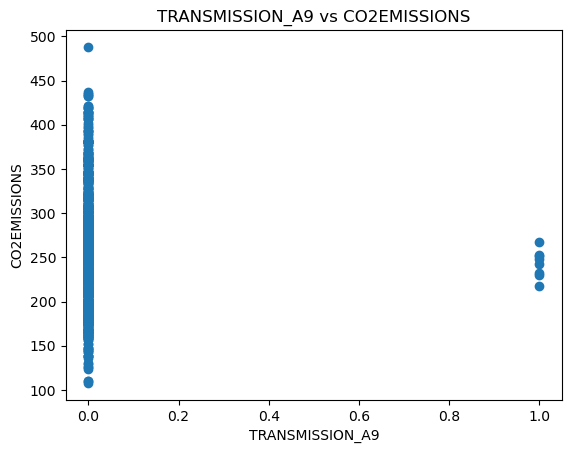

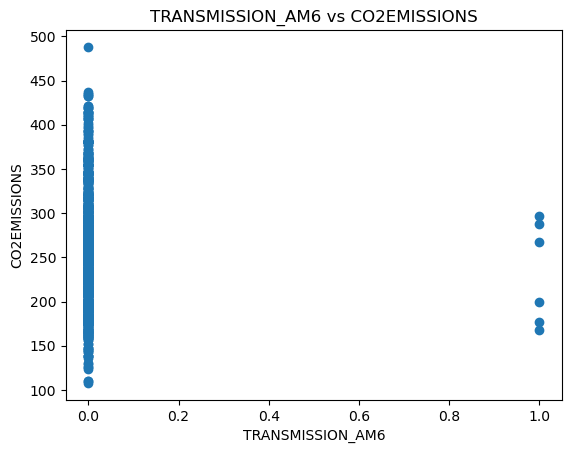

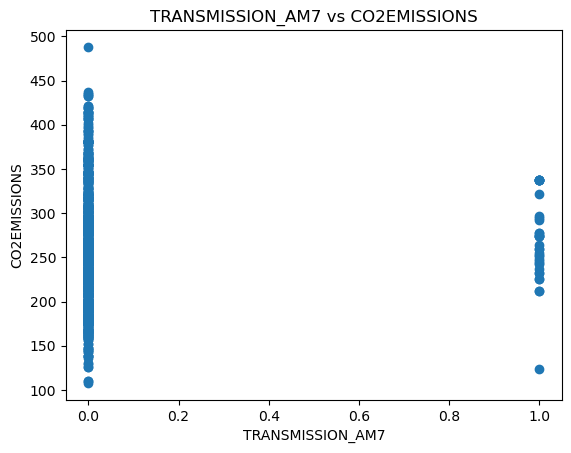

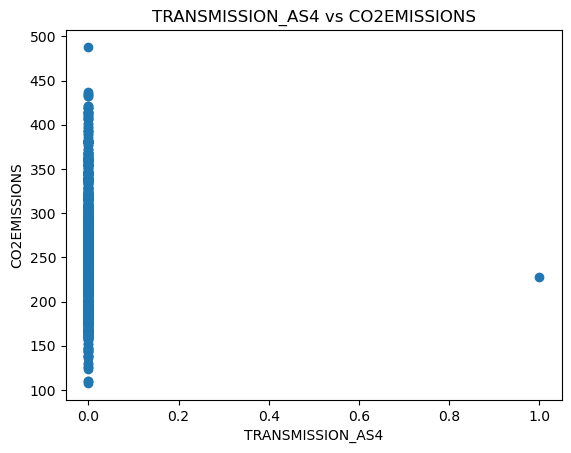

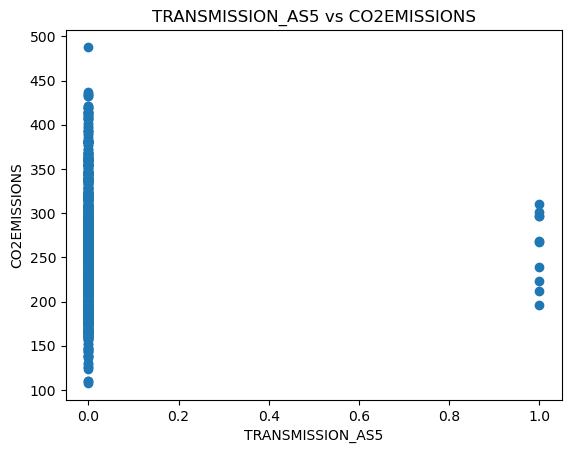

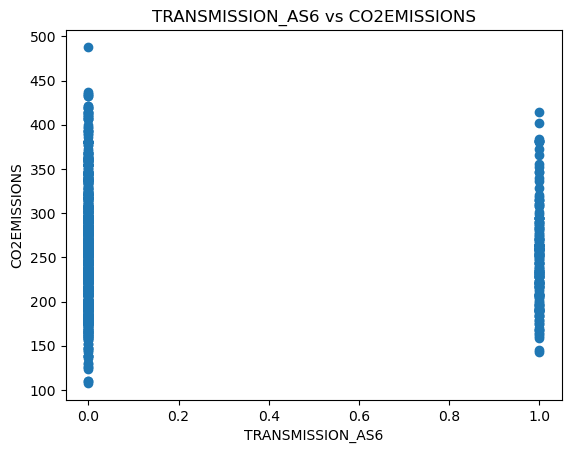

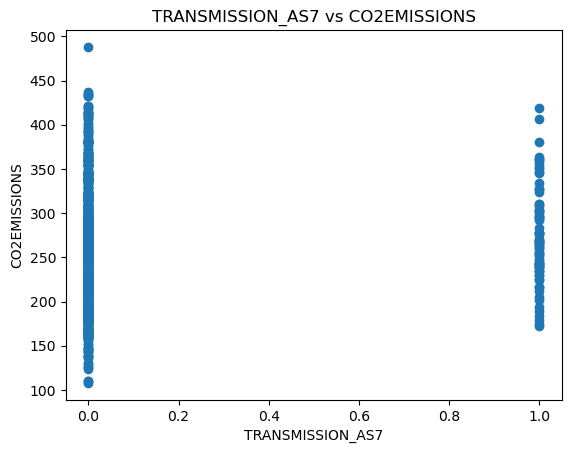

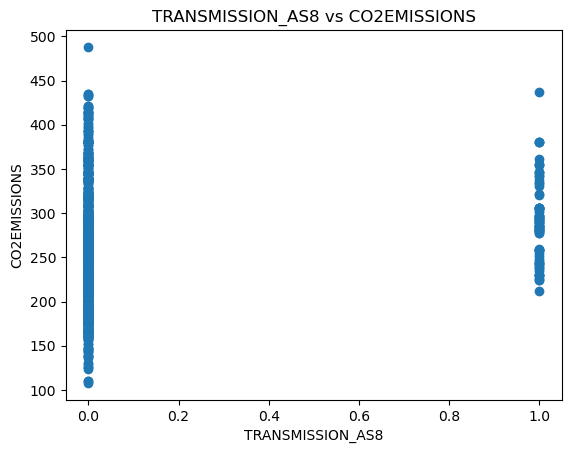

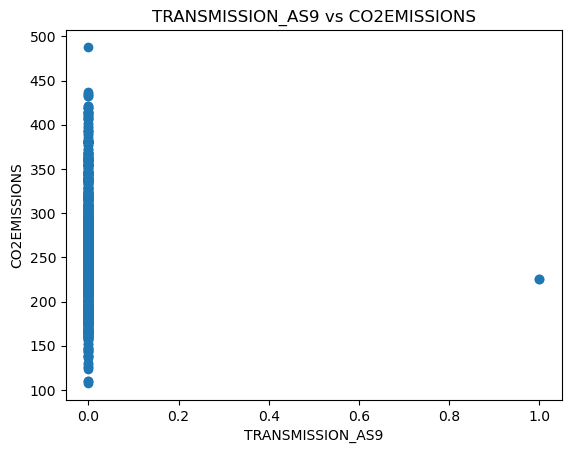

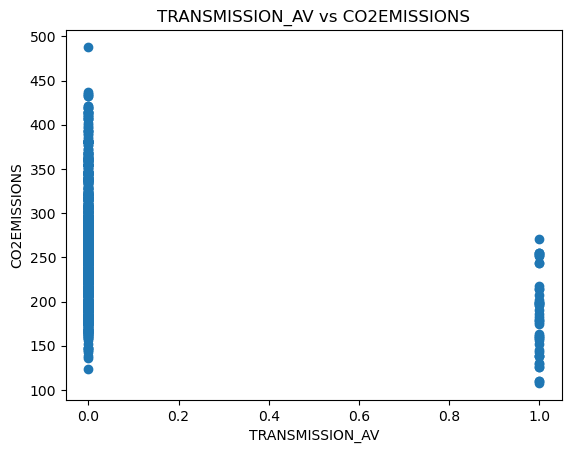

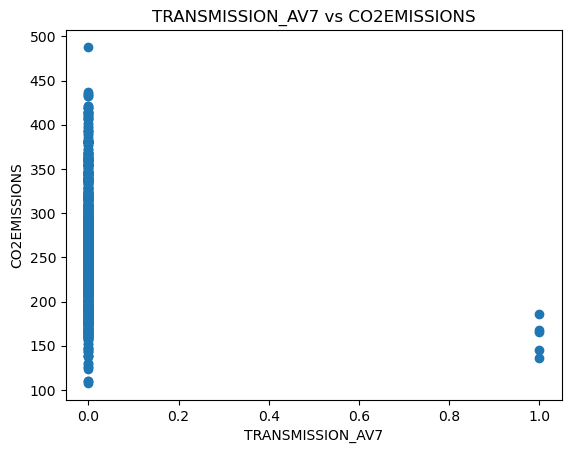

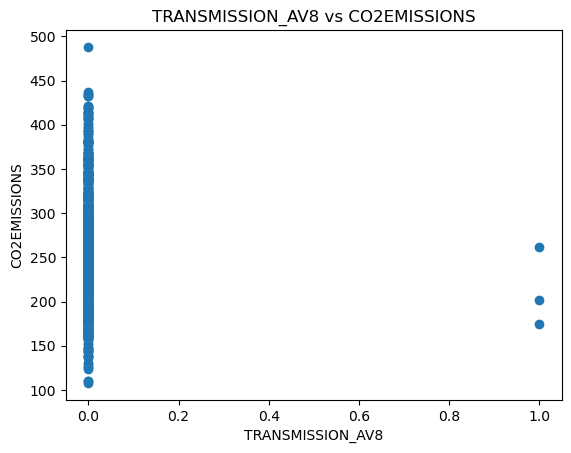

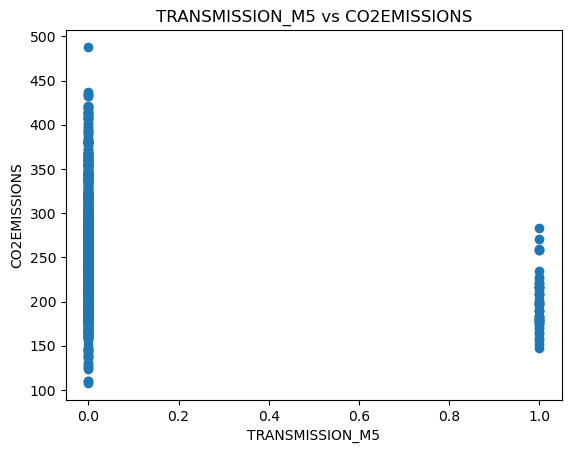

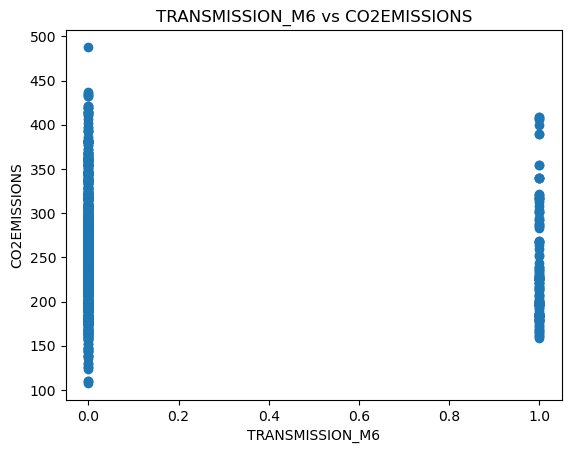

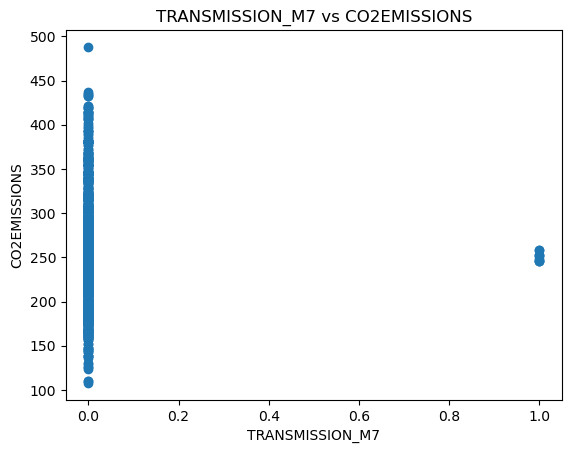

In [239]:
for i in columns:
    y=df['CO2EMISSIONS']
    x=df[i]
    #creating scatter plot
    plt.scatter(x,y)
    
    #creating label and title
    plt.ylabel('CO2EMISSIONS')
    plt.xlabel(i)
    plt.title(i+' vs CO2EMISSIONS')
    
    #display the plot
    plt.show()

In [241]:
columns = df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','TRANSMISSION_A4','TRANSMISSION_A5','TRANSMISSION_A6','TRANSMISSION_A7','TRANSMISSION_A8','TRANSMISSION_A9','TRANSMISSION_AM5','TRANSMISSION_AM6','TRANSMISSION_AM7','TRANSMISSION_AS4','TRANSMISSION_AS5','TRANSMISSION_AS6','TRANSMISSION_AS7','TRANSMISSION_AS8','TRANSMISSION_AS9','TRANSMISSION_AV','TRANSMISSION_AV6','TRANSMISSION_AV7','TRANSMISSION_AV8','TRANSMISSION_M5','TRANSMISSION_M6','TRANSMISSION_M7']]

### Correlation

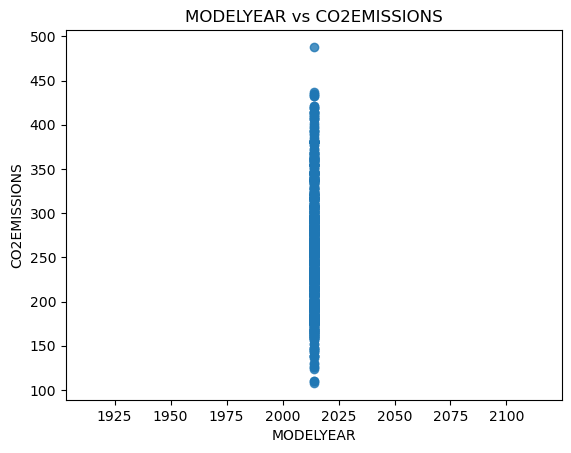

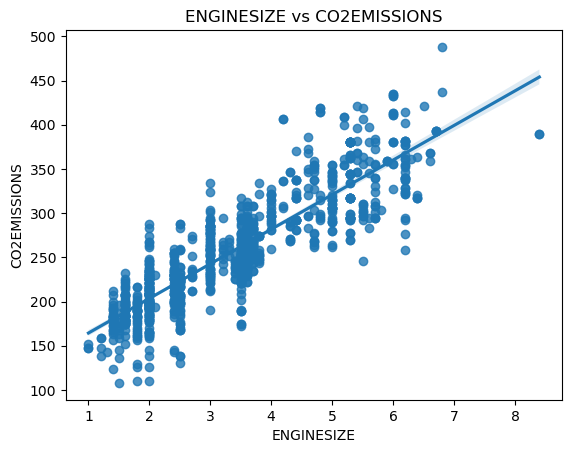

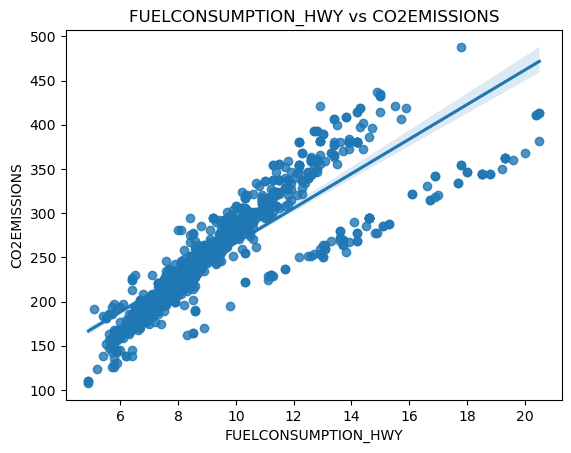

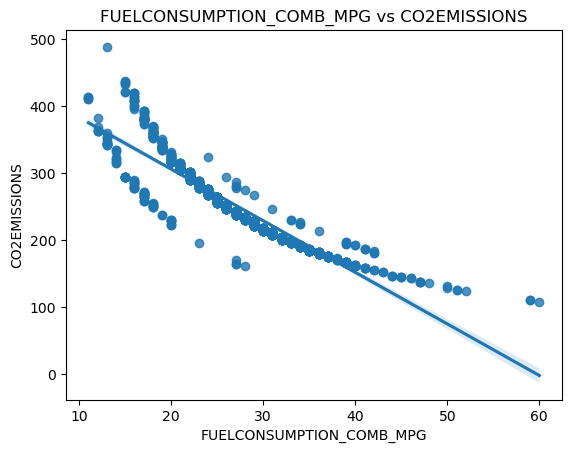

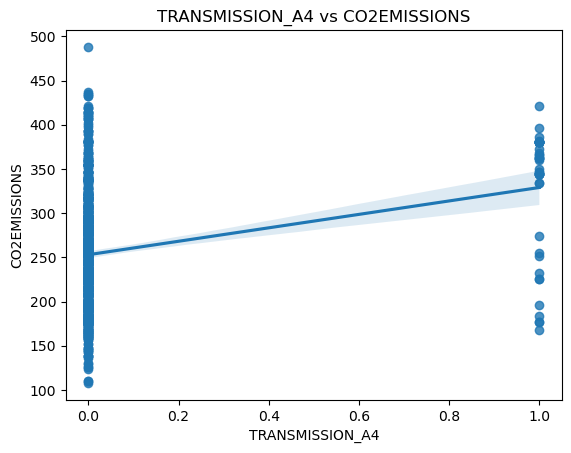

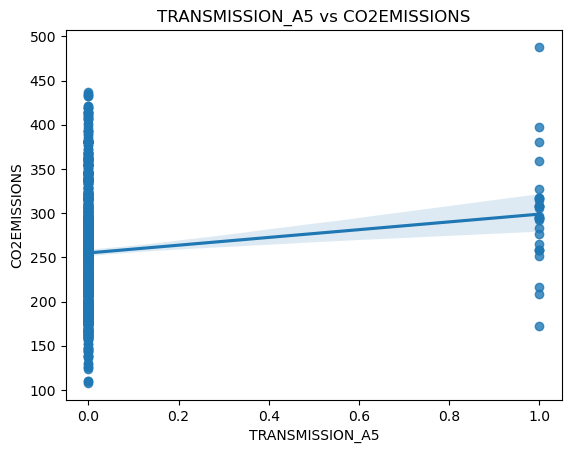

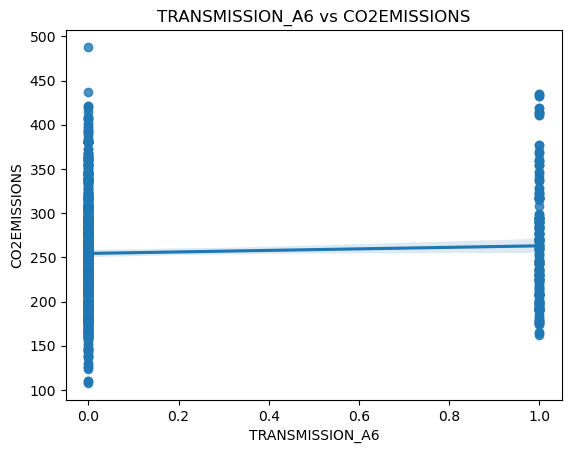

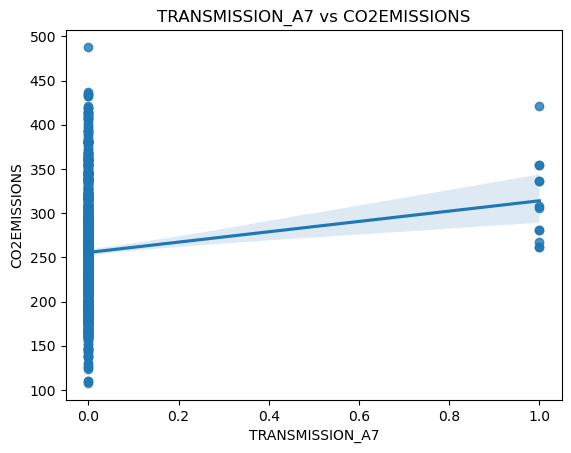

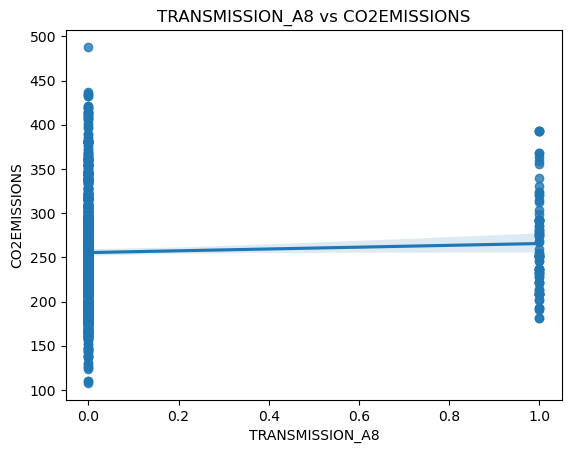

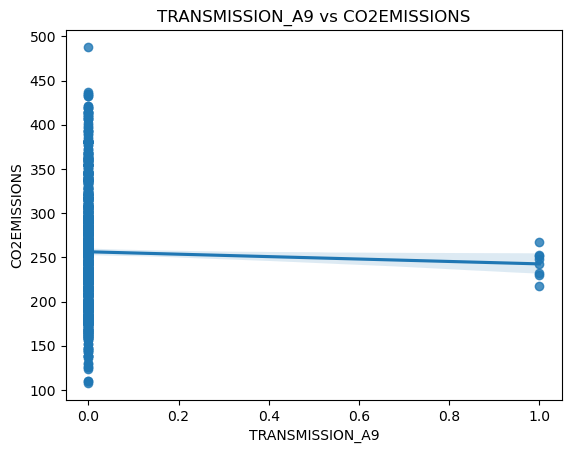

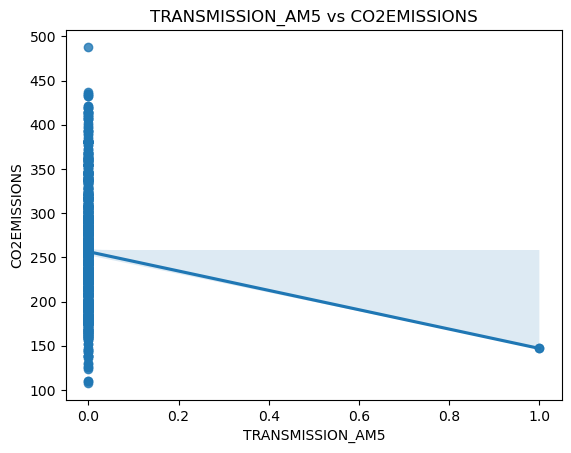

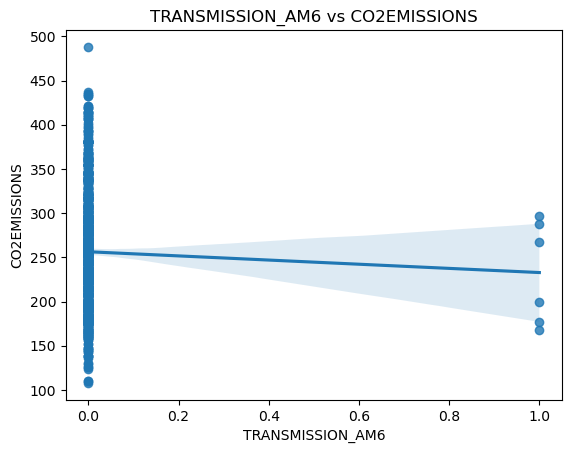

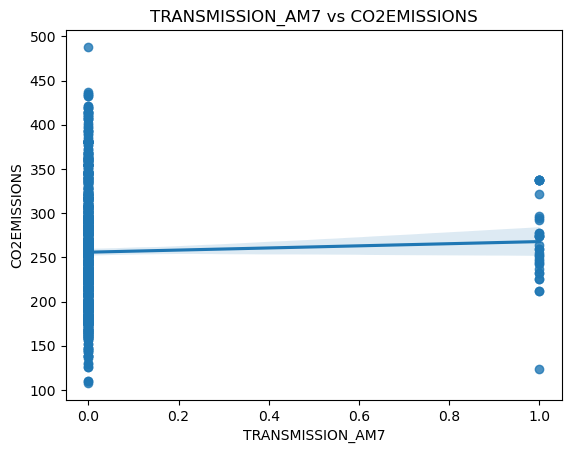

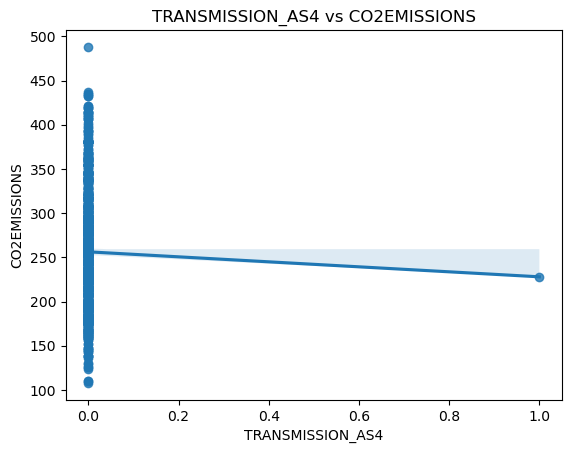

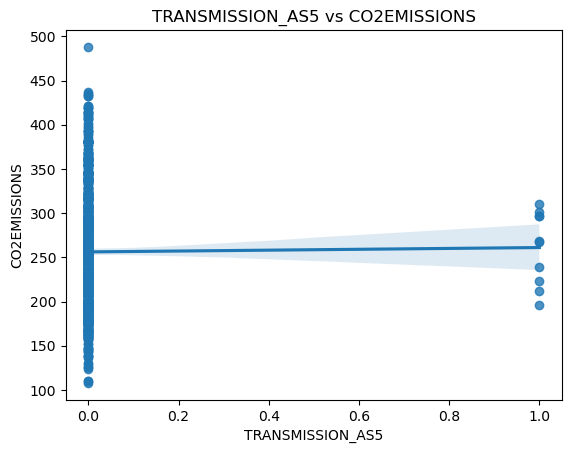

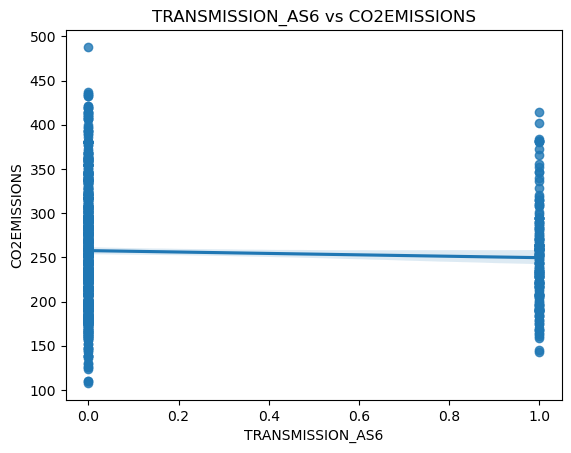

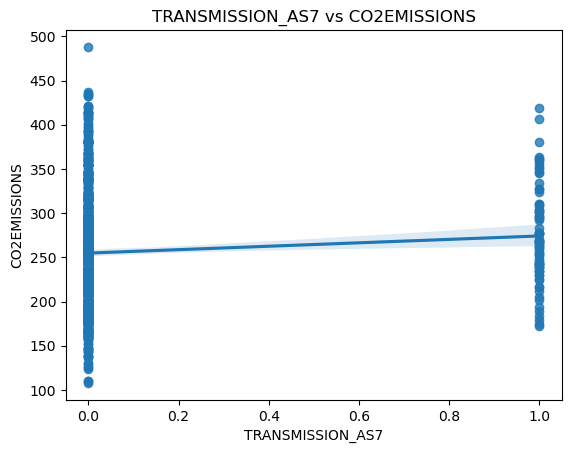

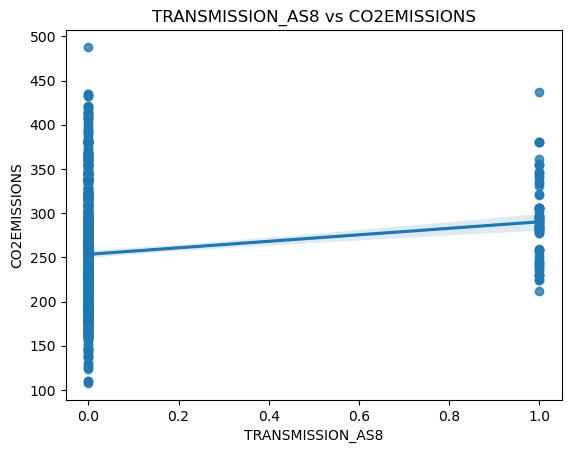

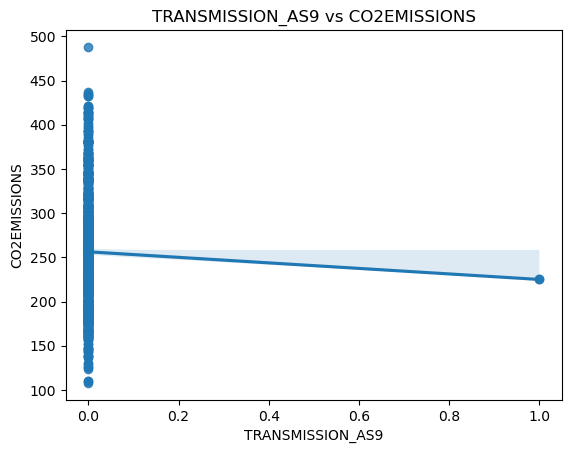

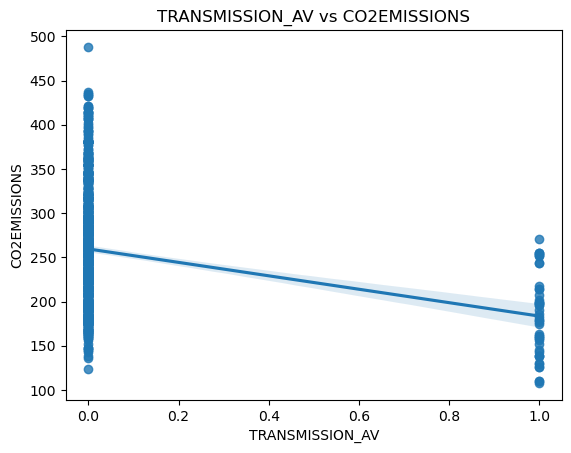

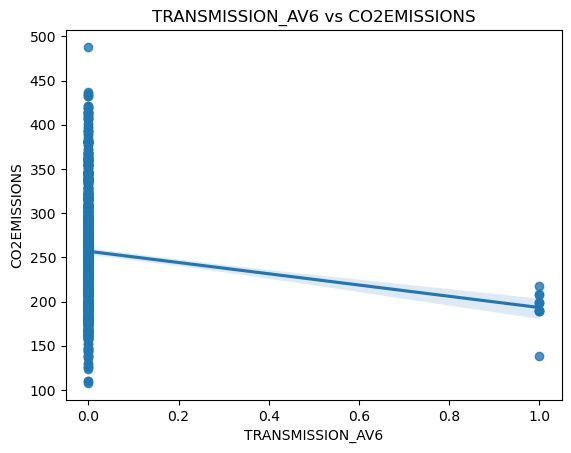

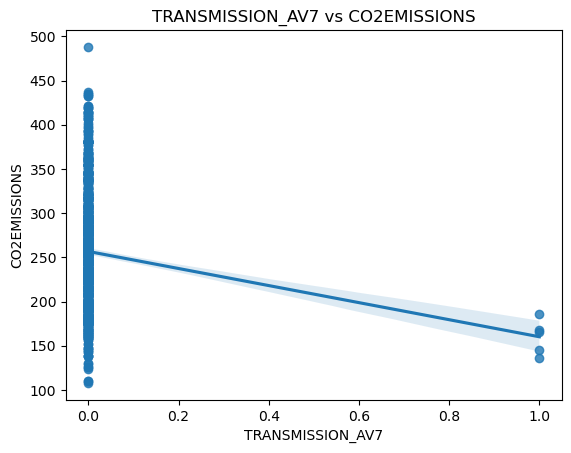

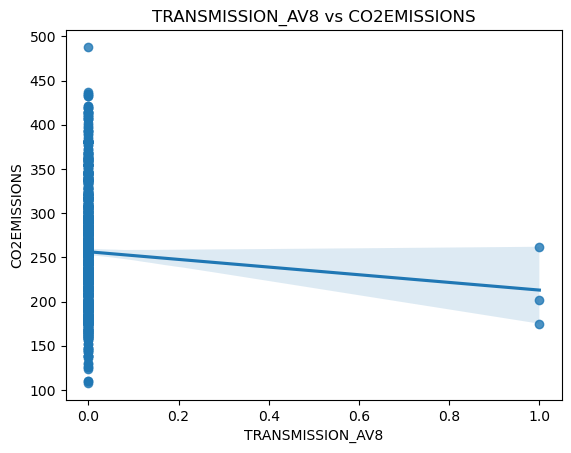

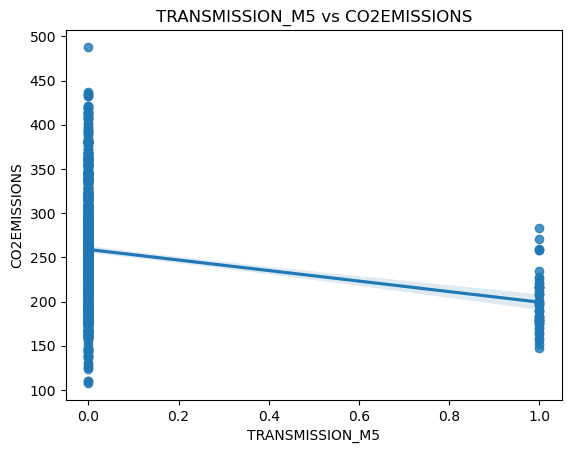

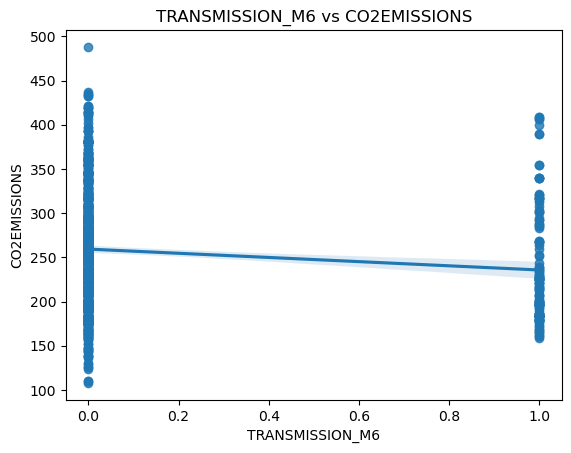

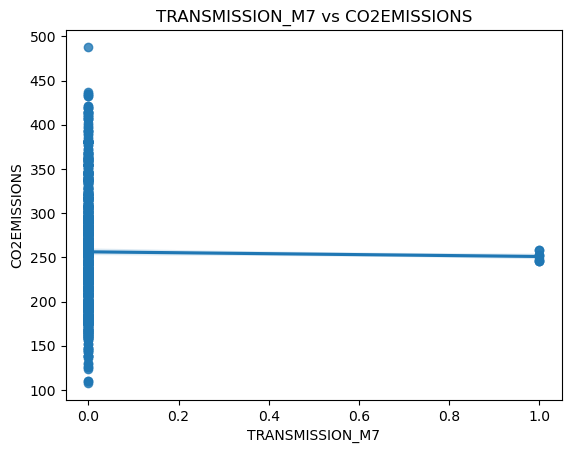

In [242]:
for i in columns:
    Y=df['CO2EMISSIONS']
    X=df[i]
    #creating scatter plot
    sns.regplot(x=X,y=Y,data=df)
    
    #creating label and title
    plt.ylabel('CO2EMISSIONS')
    plt.xlabel(i)
    plt.title(i+' vs CO2EMISSIONS')
    
    #display the plot
    plt.show()

 ### Correlation statistics

In [48]:
pearson_coef, p_val = stats.pearsonr(df['ENGINESIZE'],df['CO2EMISSIONS'])

In [51]:
print('pearson coef is: ',round(pearson_coef,2),' and p value is: ',p_val)

pearson coef is:  0.87  and p value is:  0.0


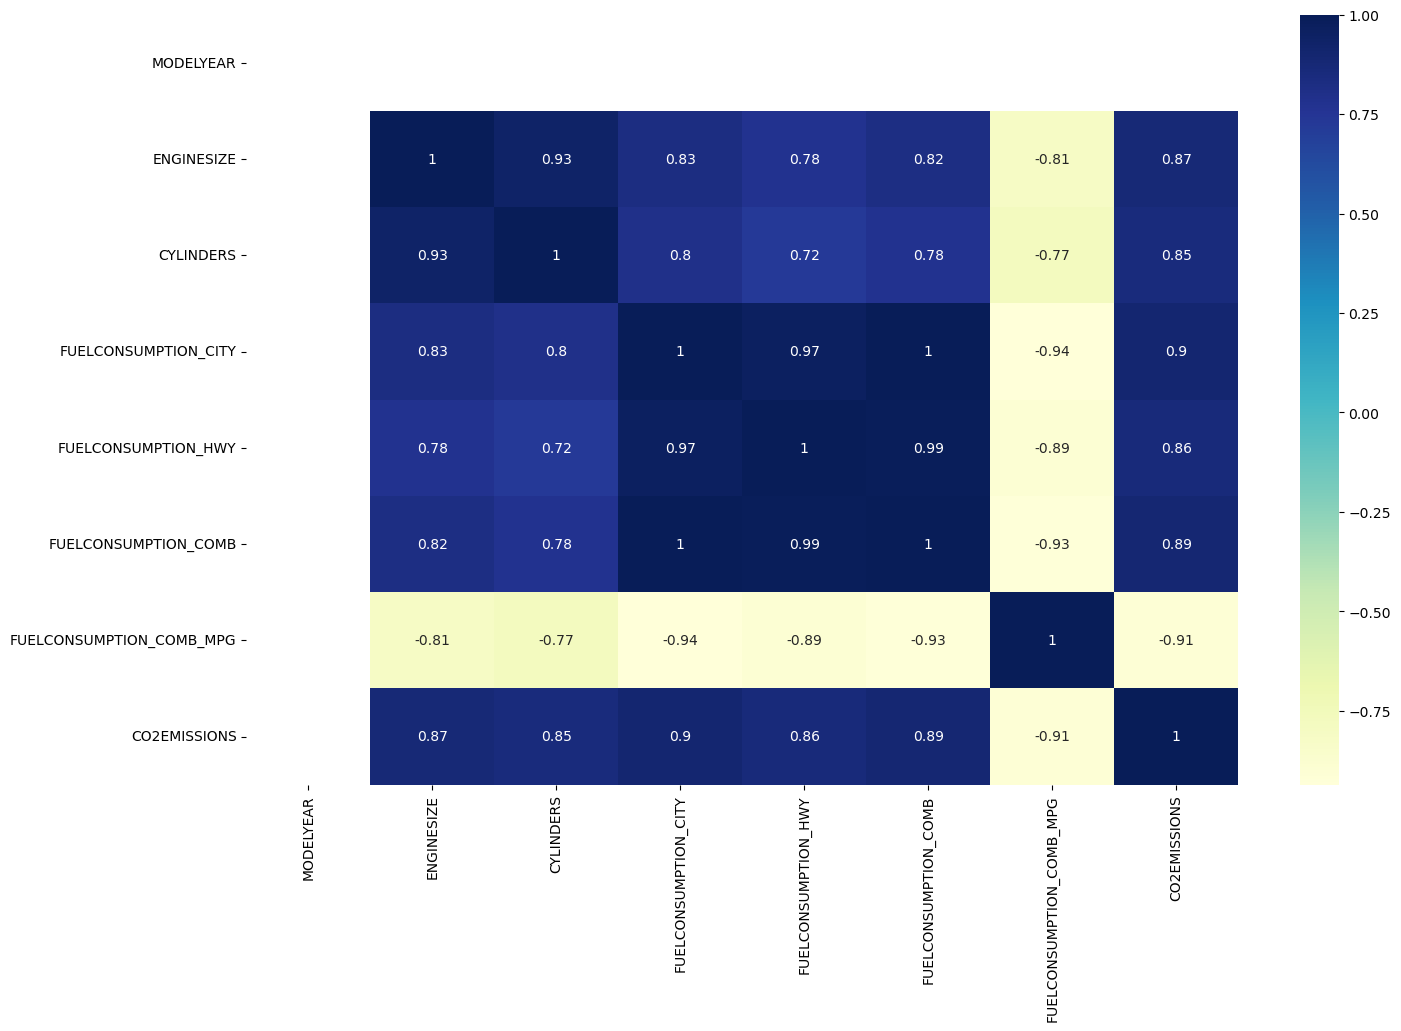

In [52]:
# Lets check the correlation coefficient for the other values

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Model Development

#### Simple Linear Regression

In [53]:
# Import the linear model
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
#defining the prdictor variable and target variable
X= df[['ENGINESIZE']]
Y = df['CO2EMISSIONS']

#fiting the model
lm.fit(X,Y)


LinearRegression()

In [57]:
lm.score(X,Y)

0.7641458597854816

In [58]:
#obtaining the prediction
Yhat = lm.predict(X)
Yhat

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [61]:
#viewing the intercept of the constant value from the equation
print('The intercept is', round(lm.intercept_,2))

The intercept is 125.3


In [64]:
#SLope
print('The Co-efficient is', round(lm.coef_[0],2))

The Co-efficient is 39.13


### We got below equation
### Yhat = predicted price = 125.3 + (39.13 * ENGINESIZE)

## Multiple Linear Regression

#### Defining the predictor and target variable

In [305]:
Z = df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = df['CO2EMISSIONS']

In [306]:
lm_multi = LinearRegression()

In [307]:
lm_multi.fit(Z,Y)

LinearRegression()

In [308]:
lm_multi.score(Z,Y)

0.8892861092642407

In [309]:
#### Predicting the value
Yhat_multi = lm_multi.predict(Z)
Yhat_multi

array([196.45134368, 217.62793788, 132.41792225, ..., 265.94348838,
       261.95425268, 275.86576134])

#### FInding the intercept

In [310]:
lm_multi.intercept_

253.53120114591692

#### co-efficeint

In [311]:
lm_multi.coef_

array([  0.        ,   8.57767262,   7.698747  , -10.59262337,
        -3.48918281,  17.75286099,  -3.86924281])

### Residual Plot to check if the linear model is right fit

In [312]:
columns = df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

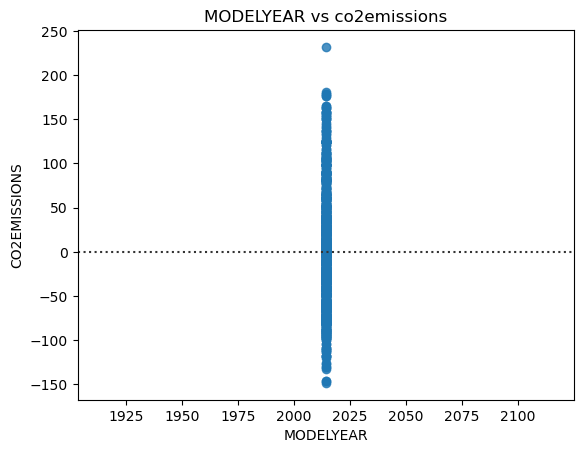

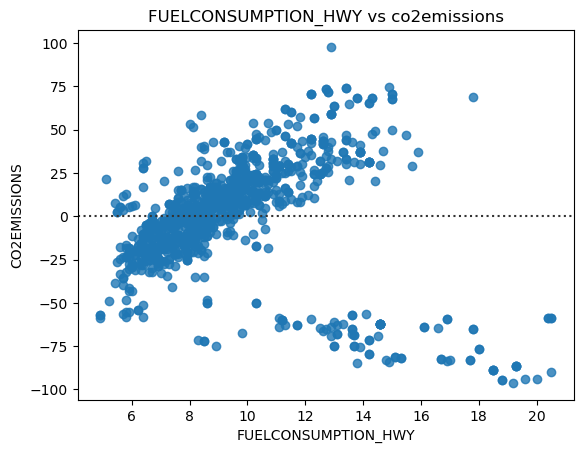

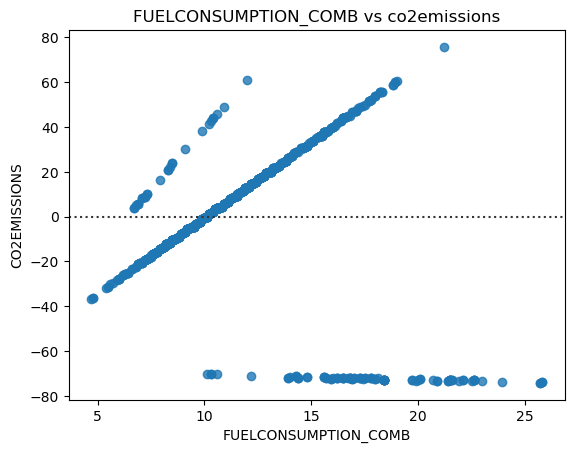

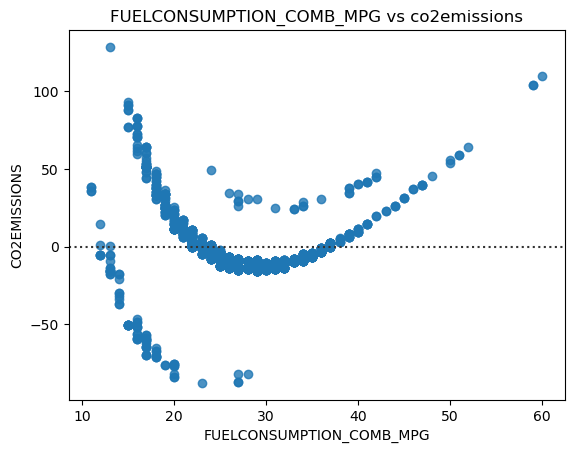

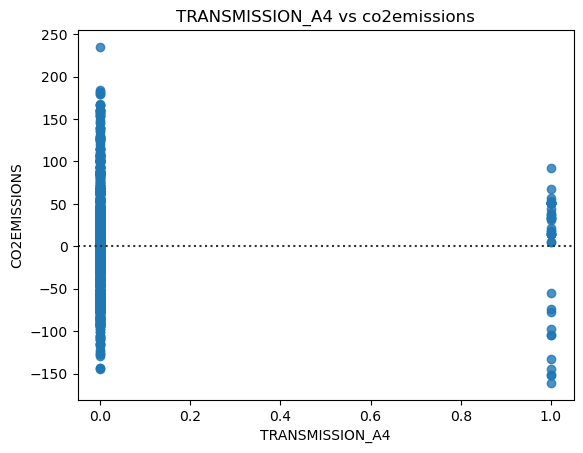

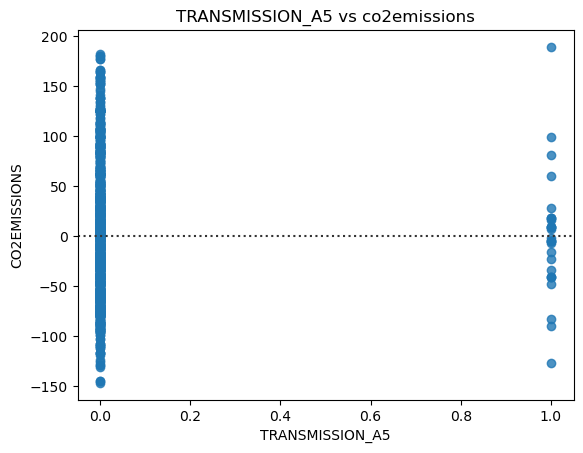

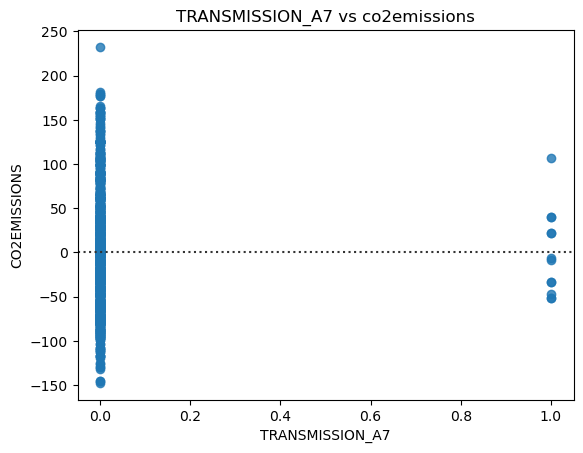

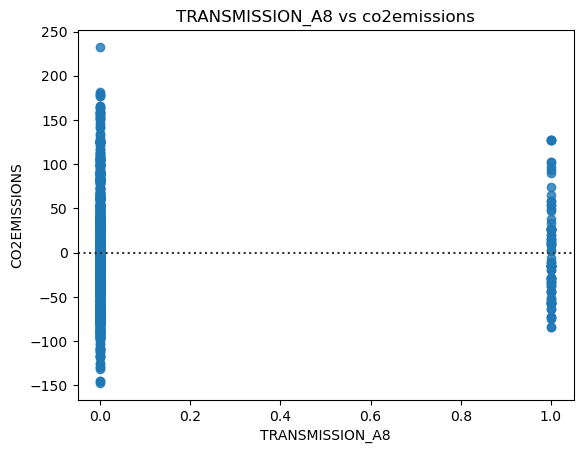

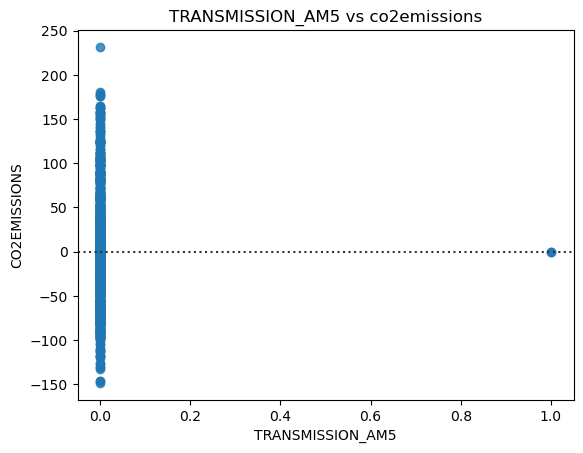

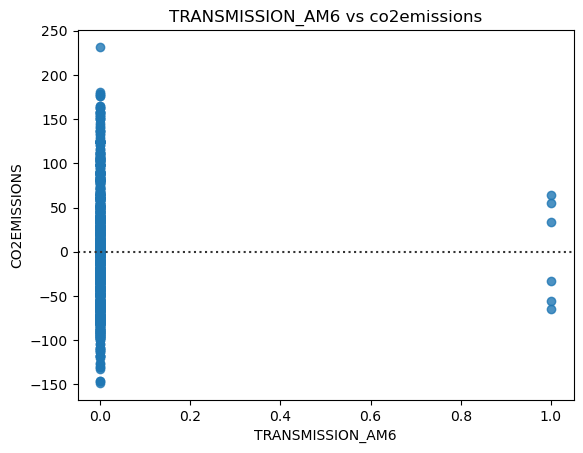

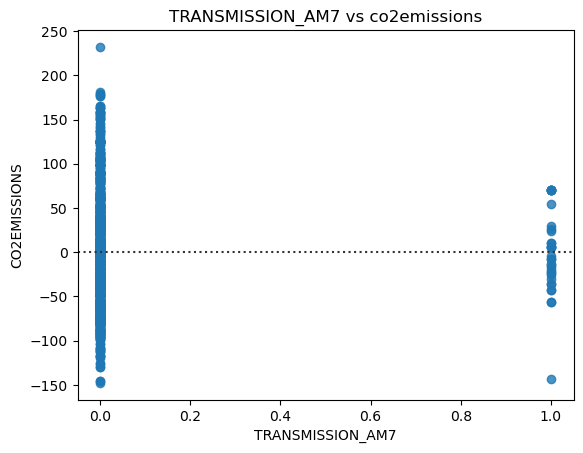

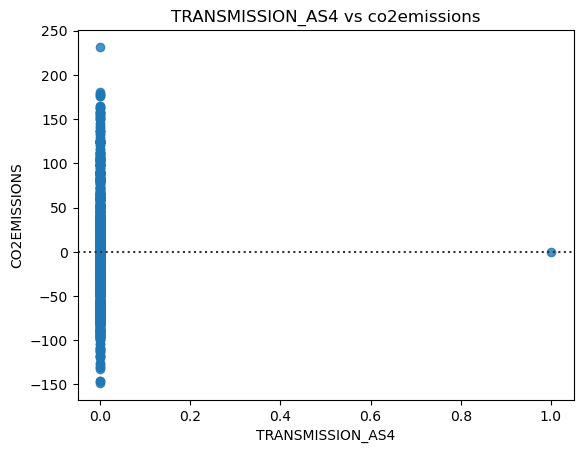

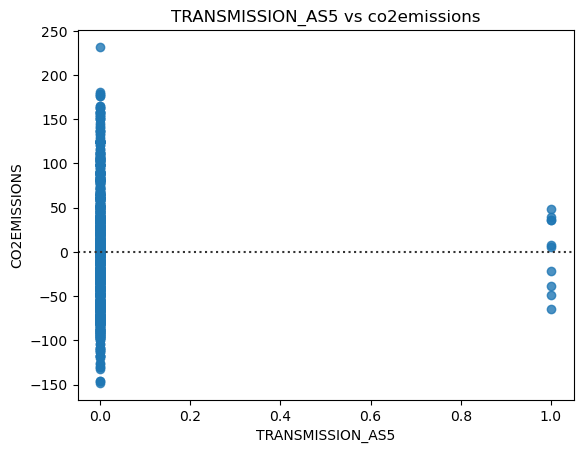

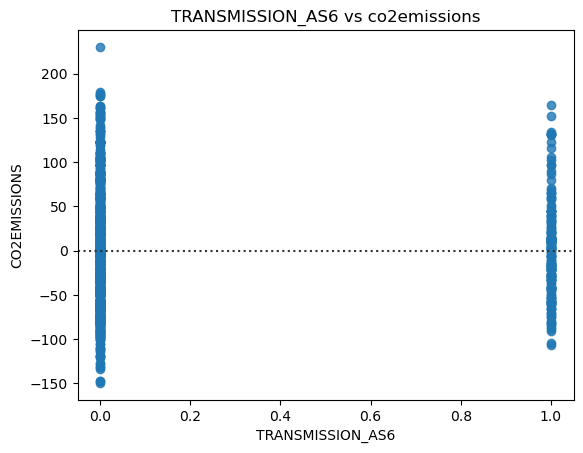

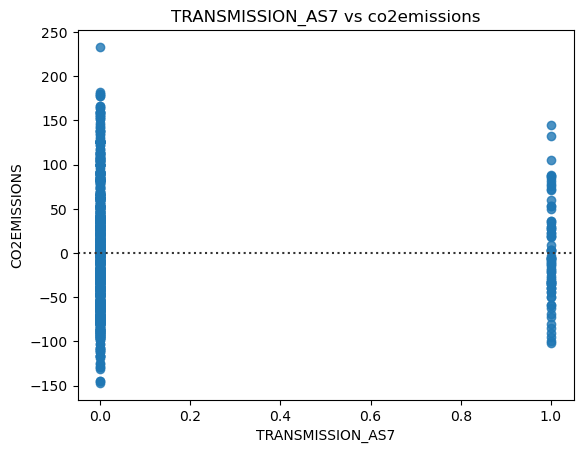

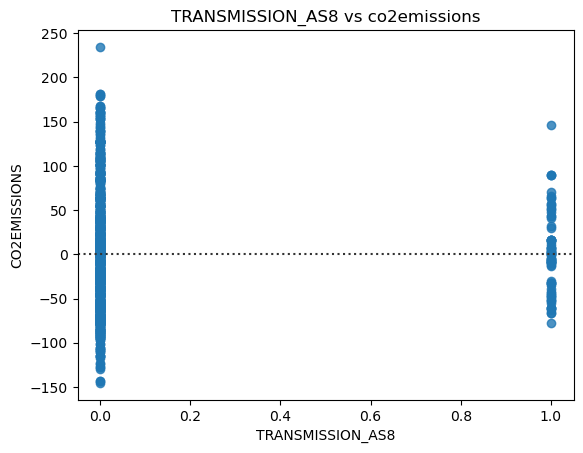

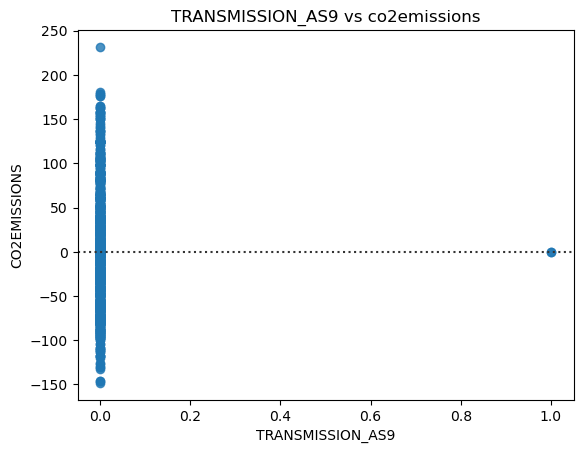

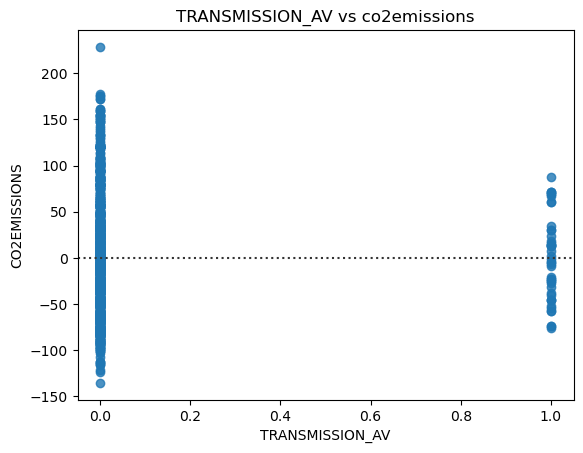

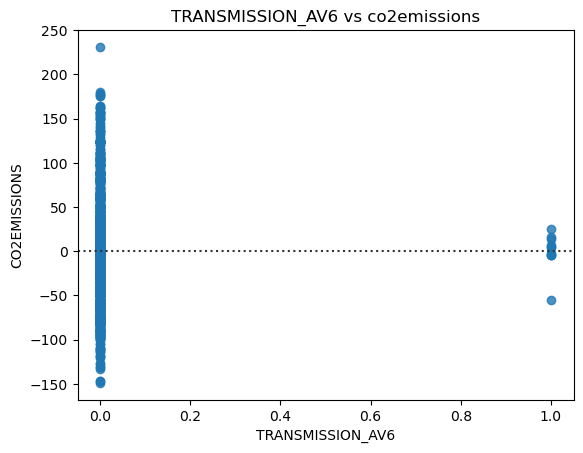

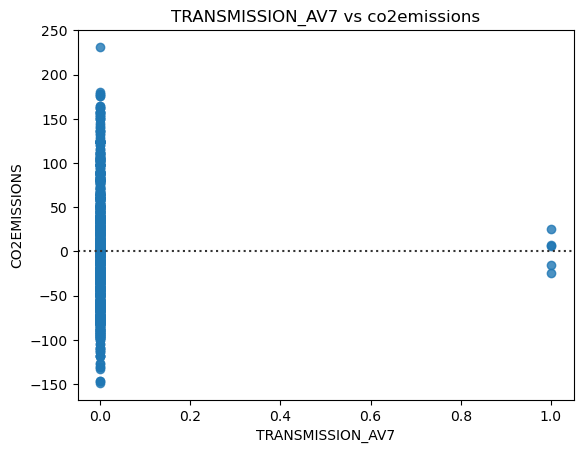

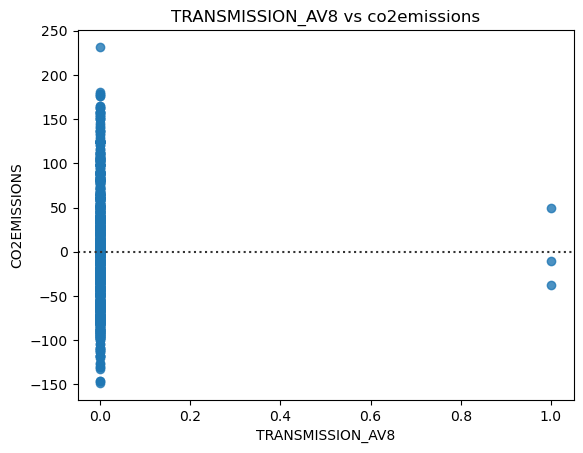

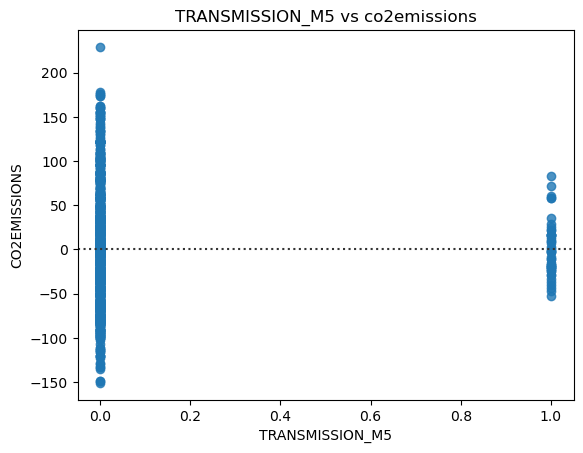

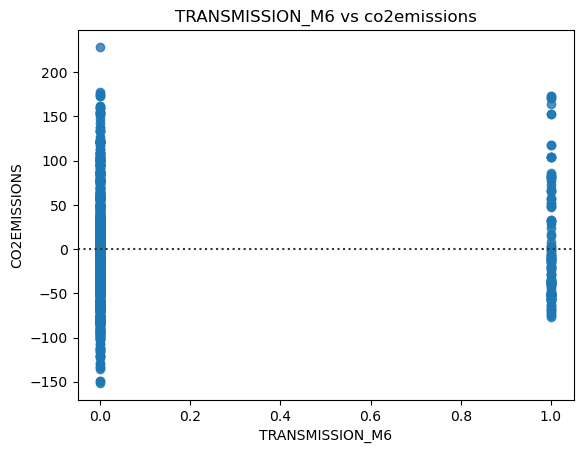

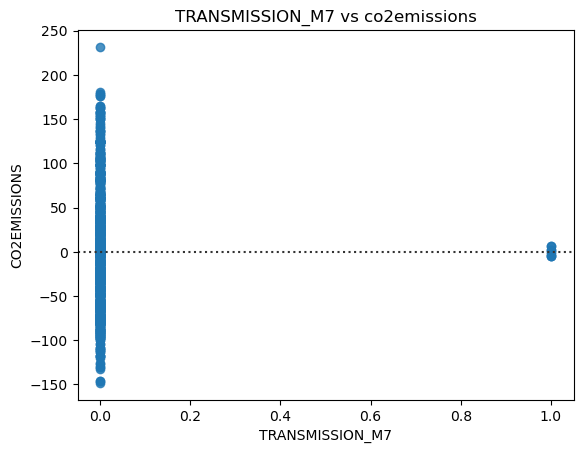

In [254]:
for i in columns:
    X=df[i]
    Y = df['CO2EMISSIONS']
    
    #creating residual plot
    sns.residplot(x=X,y=Y,data=df)
    plt.xlabel(i)
    plt.ylabel('CO2EMISSIONS')
    plt.title(i+' vs co2emissions')
    plt.show()

### plotting the distribution plot

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

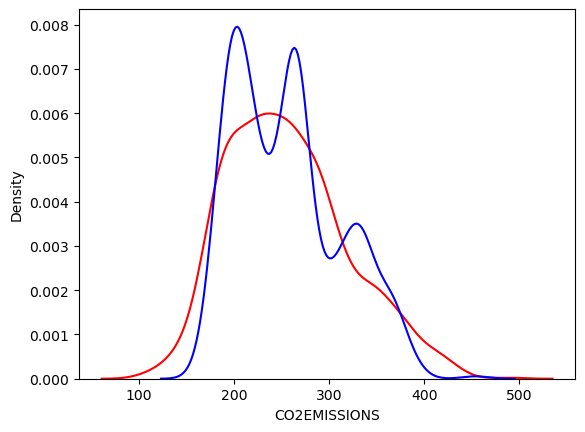

In [313]:
ax1 = sns.distplot(df['CO2EMISSIONS'],hist=False, color = 'r',label = 'Actual Value')
sns.distplot(Yhat,hist=False, color = 'b',label = 'Predicted Value')

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

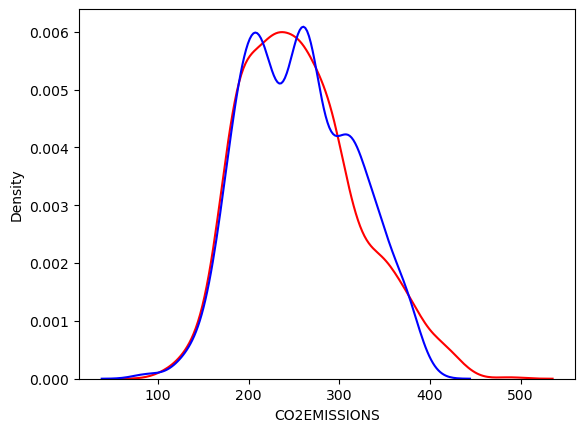

In [314]:
ax1 = sns.distplot(df['CO2EMISSIONS'],hist=False, color = 'r',label = 'Actual Value')
sns.distplot(Yhat_multi,hist=False, color = 'b',label = 'Predicted Value')

## Polynomial Linear Regression

In [315]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [175]:
Scale = StandardScaler()

In [316]:
Scale.fit(df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])

StandardScaler()

In [317]:
x_scale = Scale.transform(df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])

In [322]:
lm = LinearRegression()

In [323]:
lm.fit(x_scale,df['CO2EMISSIONS'])

LinearRegression()

In [324]:
lm.score(x_scale,df['CO2EMISSIONS'])

0.8892861092642407

In [325]:
Yhat_scale = lm.predict(x_scale)
Yhat_scale

array([196.45134368, 217.62793788, 132.41792225, ..., 265.94348838,
       261.95425268, 275.86576134])

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

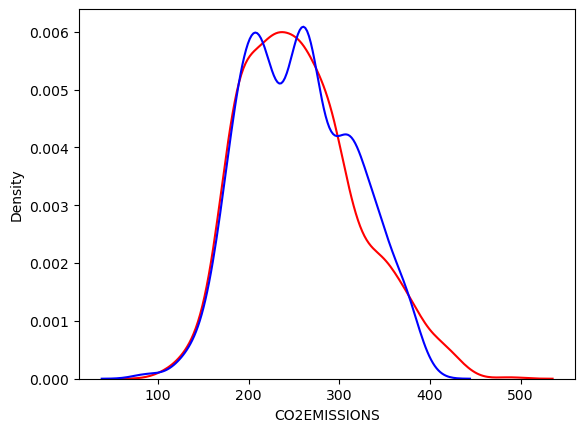

In [326]:
ax2 = sns.distplot(df['CO2EMISSIONS'],hist=False, color = 'r',label = 'Actual Value')
sns.distplot(Yhat_scale,hist=False, color = 'b',label = 'Predicted Value')

### Pipeline

In [327]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [328]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3)),('model',LinearRegression())]

In [329]:
P = df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Q = df['CO2EMISSIONS']

In [330]:
pipe = Pipeline(Input)

In [331]:
pipe.fit(P,Q)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [332]:
pipe.score(P,Q)

0.9537472032991696

In [334]:
Yhat_poly= pipe.predict(P)
Yhat_poly

array([195.1688958 , 222.57349439, 133.84098474, ..., 273.66134348,
       261.59615126, 282.7425749 ])

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

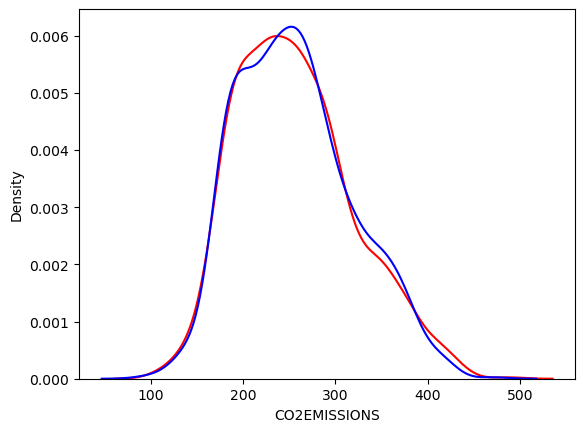

In [335]:
ax2 = sns.distplot(df['CO2EMISSIONS'],hist=False, color = 'r',label = 'Actual Value')
sns.distplot(Yhat_poly,hist=False, color = 'b',label = 'Predicted Value')

### Mean Squared Error

In [336]:
from sklearn.metrics import mean_squared_error

In [337]:
mean_squared_error(df['CO2EMISSIONS'],Yhat)

946.3140527188748

In [338]:
mean_squared_error(df['CO2EMISSIONS'],Yhat_multi)

444.2156942385605

In [340]:
mean_squared_error(df['CO2EMISSIONS'],Yhat_scale)

444.21569423856045

In [341]:
mean_squared_error(df['CO2EMISSIONS'],Yhat_poly)

185.5794070680076

### R2 --> coefficient of determination

In [342]:
pipe.score(P,Q)

0.9537472032991696

In [343]:
df['ENGINESIZE']=df['ENGINESIZE'].astype(float)

### Train Test Split, Model Evaluation

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
xtrain,xtest,ytrain,ytest = train_test_split(P,Q,test_size=0.3,random_state = 10)

In [346]:
xtrain.shape

(746, 7)

In [347]:
xtest.shape

(321, 7)

In [348]:
xtrain.head()

MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
765       2014         4.7          8                  16.2   
94        2014         3.0          6                  11.4   
375       2014         3.7          6                  14.0   
994       2014         3.5          6                  12.9   
903       2014         3.0          6                  13.4   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
765                 11.8                  14.2                        20  
94                   7.3                   9.6                        29  
375                 10.3                  12.3                        23  
994                  9.4                  11.3                        25  
903                  8.8                  11.3                        25

In [349]:
ytrain.head()

765    327
94     221
375    283
994    260
903    260
Name: CO2EMISSIONS, dtype: int64

In [350]:
Input = [('Scale',StandardScaler()),('polynomial',PolynomialFeatures(degree = 3)),('model',LinearRegression())]

In [351]:
pipe = Pipeline(Input)

In [352]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('Scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

### prediction on training data

In [353]:
Yhat_poly2_train = pipe.predict(xtrain)

In [354]:
pipe.score(xtrain,ytrain)

0.9523757780592355

### Prediction on test data

In [355]:
Yhat_poly2_test = pipe.predict(xtest)

In [356]:
Yhat_poly2_test

array([173.31132401, 268.50317364, 267.31227636, 224.49983656,
       241.8701411 , 285.36268034, 365.36877238, 354.47585534,
       276.48159855, 259.88192817, 230.79823742, 264.35590632,
       180.42261998, 352.42767099, 204.79521605, 295.50168444,
       326.76221552, 317.42279953, 340.51717342, 275.29543207,
       219.25518099, 194.86782936, 254.26832983, 234.97506175,
       210.92185132, 249.10111031, 158.88075495, 175.17316837,
       197.69078076, 196.94544661, 208.89848139, 243.78961113,
       162.94683693, 207.19270471, 208.2446189 , 233.87412848,
       251.22870025, 216.64954049, 303.12339812, 281.42882058,
       207.21624009, 319.65759107, 225.62872324, 266.56613026,
       333.592009  , 304.15238878, 268.80166003, 239.75264508,
       363.91786873, 368.91986515, 264.81384942, 248.19346689,
       256.41053903, 317.25401366, 197.05185545, 181.24514261,
       196.58796515, 196.13051479, 266.11697873, 270.48033062,
       357.07010298, 210.92185132, 339.44769968, 319.03

In [357]:
pipe.score(xtest,ytest)

0.9424760766568724

### distrubution plot for prediction on training data

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

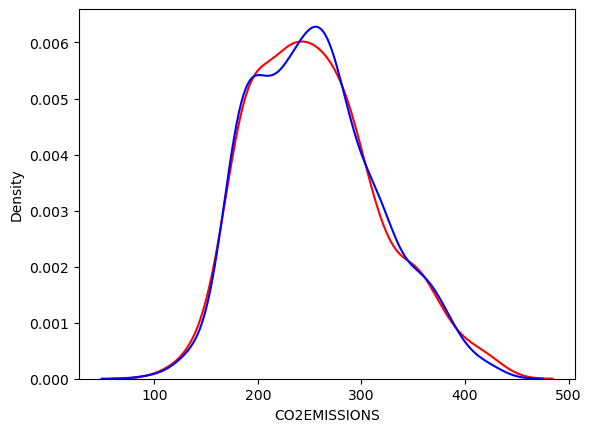

In [358]:
ax1 = sns.distplot(ytrain,hist=False, color='r', label = 'Actual Value')
sns.distplot(Yhat_poly2_train,hist=False,color = 'b',label = 'Predicted Value')

### distrubution plot for prediction on test data

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

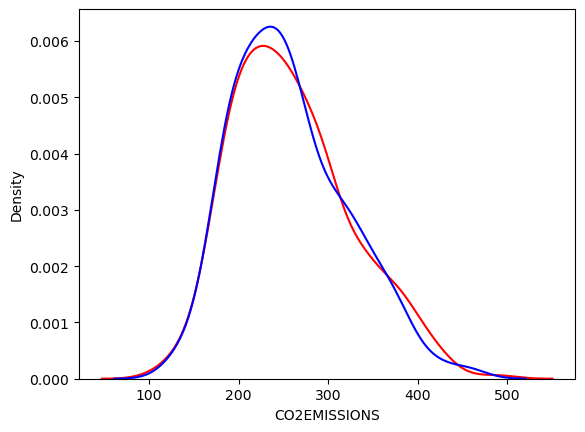

In [359]:
ax2 = sns.distplot(ytest,hist=False, color='r', label = 'Actual Value')
sns.distplot(Yhat_poly2_test,hist=False,color = 'b',label = 'Predicted Value')

#### Trying differnt orders of polynomial model and choose the right value which performs well on testing data

In [360]:
Rsquare_train = []
Rsquare_test = []
order_polynomial = [1,2,3,4,5,6,7,8]
for n in order_polynomial:
    pr = PolynomialFeatures(degree=n)
    lr = LinearRegression()
    xtrain_pr=pr.fit_transform(xtrain[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
    xtest_pr=pr.fit_transform(xtest[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
    lr.fit(xtrain_pr,ytrain)
    Rsquare_train.append(round(lr.score(xtrain_pr,ytrain),2))
    Rsquare_test.append(round(lr.score(xtest_pr,ytest),2))

In [361]:
print(Rsquare_train)
print(Rsquare_test)

[0.88, 0.92, 0.95, 0.97, 0.98, 0.98, 0.98, 0.99]
[0.89, 0.92, 0.94, -2.04, -52.53, -31.34, -25.56, -40.08]


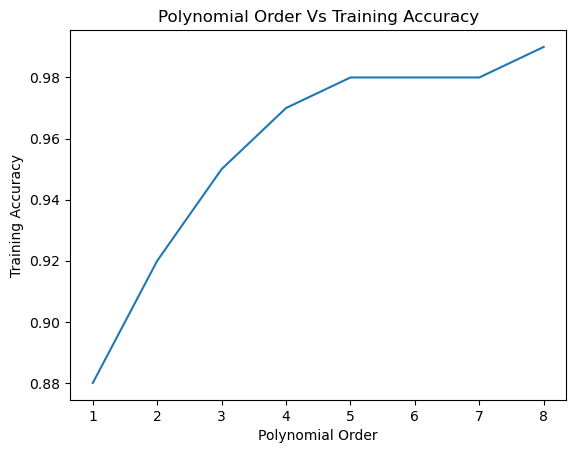

In [362]:
plt.plot(order_polynomial,Rsquare_train)
plt.xlabel('Polynomial Order')
plt.ylabel('Training Accuracy')
plt.title('Polynomial Order Vs Training Accuracy')
plt.show()

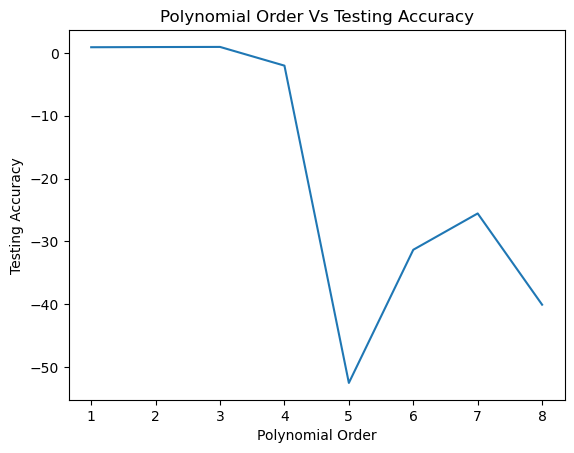

In [363]:
plt.plot(order_polynomial,Rsquare_test)
plt.xlabel('Polynomial Order')
plt.ylabel('Testing Accuracy')
plt.title('Polynomial Order Vs Testing Accuracy')
plt.show()

## Ridge Regression

     alpha  RSquare
0    0.001     0.89
1    0.010     0.89
2    0.100     0.89
3    0.800     0.89
4    0.900     0.89
5    1.000     0.89
6    1.100     0.89
7    1.500     0.89
8    2.000     0.89
9    3.000     0.89
10   4.000     0.89
11   5.000     0.89
12  10.000     0.89


<AxesSubplot:xlabel='alpha', ylabel='RSquare'>

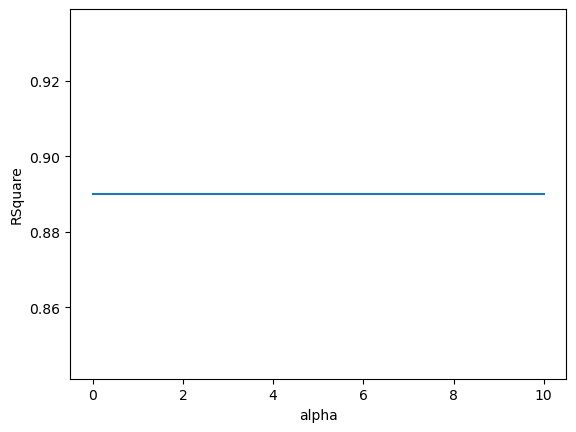

In [365]:
from sklearn.linear_model import Ridge
Ridge_Rsquare = []
alpha = [0.001,0.01,0.1,0.8,0.9,1,1.1,1.5,2,3,4,5,10]
for n in alpha:
    RidgeModel = Ridge(alpha=n)
    RidgeModel.fit(xtrain,ytrain)
    Yhat=RidgeModel.predict(xtest)
    Ridge_Rsquare.append(round(RidgeModel.score(xtest,ytest),2))

compare_alpha_and_Rsquare = {'alpha':alpha,'RSquare': Ridge_Rsquare}
compare_alpha_and_Rsquare = pd.DataFrame(compare_alpha_and_Rsquare)
print(compare_alpha_and_Rsquare)
sns.lineplot(data=compare_alpha_and_Rsquare, x="alpha", y="RSquare")

In [366]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=2)
RidgeModel.fit(xtrain,ytrain)
Yhat=RidgeModel.predict(xtest)
RidgeModel.score(xtest,ytest)

0.8939982450825756

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

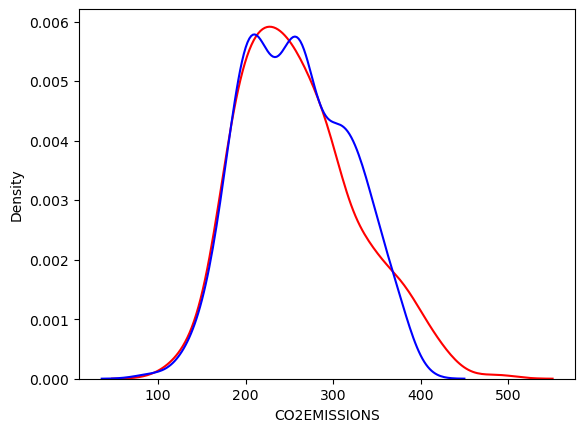

In [367]:
ax2 = sns.distplot(ytest,hist=False,color='r',label='Actual Values')
sns.distplot(Yhat,hist=False,color='b',label='Predicted Values')

## with the help of Ridge Regresion with cross validation

In [372]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [373]:
x=df[['MODELYEAR','ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

     alpha  RSquare
0    0.001     0.88
1    0.010     0.88
2    0.100     0.88
3    0.800     0.88
4    0.900     0.88
5    1.000     0.88
6    1.100     0.88
7    1.500     0.88
8    2.000     0.88
9    3.000     0.88
10   4.000     0.88
11   5.000     0.88
12  10.000     0.88


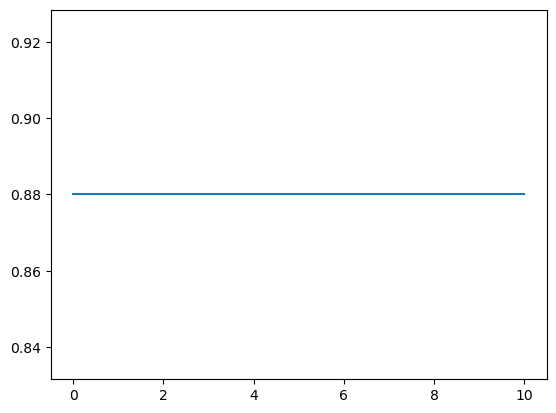

In [375]:
from sklearn.linear_model import Ridge
Ridge_Rsquare = []
alpha = [0.001,0.01,0.1,0.8,0.9,1,1.1,1.5,2,3,4,5,10]
for n in alpha:
    RidgeModel = Ridge(alpha=n)
    scores = cross_val_score(RidgeModel,x,y,cv=4)
    Ridge_Rsquare.append(round(np.mean(scores),2))
compare_alpha_and_Rsquare = {'alpha':alpha,'RSquare': Ridge_Rsquare}
compare_alpha_and_Rsquare = pd.DataFrame(compare_alpha_and_Rsquare)
print(compare_alpha_and_Rsquare)
plt.plot(compare_alpha_and_Rsquare['alpha'],compare_alpha_and_Rsquare['RSquare'])
plt.show()

## Gridge Search CV

In [376]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [377]:
parameters2 = [{'alpha':[0.001,0.01,0.1,0.8,0.9,1,1.1,1.5,2,3,4,5,10],'normalize':[True,False]}]
RR = Ridge()
Grid = GridSearchCV(RR,parameters2,cv=4)
Grid.fit(x,y)
best_estimator = Grid.best_estimator_
scores = Grid.cv_results_
best_estimator

Ridge(alpha=0.01, normalize=True)

In [378]:
scores

{'mean_fit_time': array([0.00185418, 0.00148928, 0.00175148, 0.00175506, 0.00149983,
        0.0020389 , 0.00111264, 0.0002085 , 0.        , 0.00172234,
        0.00076109, 0.00373304, 0.        , 0.00396937, 0.00375074,
        0.0019595 , 0.00150156, 0.00150388, 0.00037163, 0.00390607,
        0.00064492, 0.0033946 , 0.        , 0.00390816, 0.0037508 ,
        0.        ]),
 'std_fit_time': array([0.00074897, 0.00049722, 0.00043491, 0.00043518, 0.00049943,
        0.00063998, 0.00124988, 0.00036113, 0.        , 0.0003792 ,
        0.00043958, 0.00646581, 0.        , 0.00687515, 0.00649647,
        0.00108396, 0.00049675, 0.00050363, 0.00064369, 0.00676551,
        0.00111704, 0.00587963, 0.        , 0.00676913, 0.00649658,
        0.        ]),
 'mean_score_time': array([0.00099885, 0.00098825, 0.00087625, 0.00095856, 0.0004999 ,
        0.00138509, 0.00024861, 0.        , 0.        , 0.00099963,
        0.00064713, 0.00017929, 0.        , 0.00017482, 0.        ,
        0.00072914, 

In [379]:
for params,mean_val in zip(scores['params'],scores['mean_test_score']):
    print(params,"R^2 on test data: ",round(mean_val,2))

{'alpha': 0.001, 'normalize': True} R^2 on test data:  0.88
{'alpha': 0.001, 'normalize': False} R^2 on test data:  0.88
{'alpha': 0.01, 'normalize': True} R^2 on test data:  0.88
{'alpha': 0.01, 'normalize': False} R^2 on test data:  0.88
{'alpha': 0.1, 'normalize': True} R^2 on test data:  0.88
{'alpha': 0.1, 'normalize': False} R^2 on test data:  0.88
{'alpha': 0.8, 'normalize': True} R^2 on test data:  0.86
{'alpha': 0.8, 'normalize': False} R^2 on test data:  0.88
{'alpha': 0.9, 'normalize': True} R^2 on test data:  0.85
{'alpha': 0.9, 'normalize': False} R^2 on test data:  0.88
{'alpha': 1, 'normalize': True} R^2 on test data:  0.85
{'alpha': 1, 'normalize': False} R^2 on test data:  0.88
{'alpha': 1.1, 'normalize': True} R^2 on test data:  0.85
{'alpha': 1.1, 'normalize': False} R^2 on test data:  0.88
{'alpha': 1.5, 'normalize': True} R^2 on test data:  0.83
{'alpha': 1.5, 'normalize': False} R^2 on test data:  0.88
{'alpha': 2, 'normalize': True} R^2 on test data:  0.8
{'alpha